## Assignment 2: Problem Statement: MSFT and IBM stock.
### 1. Predict how many days in either of stock should a trader buy or sell based on past data. 2. Predict what would be prices for MSFT and IBM stocks for the next 10 days using Time Series Models.

### ✅ We successfully identified 4242 buy and 1,746 sell opportunities in both MSFT and IBM historical data.
### ✅ Using ARIMA modeling, we forecasted stock prices for both companies over the next 10 days, aiding in short-term trading decision-making.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay,auc, roc_curve
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

msft_df = pd.read_csv("C:/Users/Shourya Sharma/Desktop/MSFT_final_data.csv", index_col=0, parse_dates=True)
ibm_df = pd.read_csv("C:/Users/Shourya Sharma/Desktop/IBM_final_data.csv", index_col=0, parse_dates=True)


In [25]:
msft_df



,Open,High,Low,Close,Adj Close,Volume,MSFT_std_5,MSFT_std_10,MSFT_std_15,MSFT_std_20,...,MSFT_MACD_Daily,MSFT_MACD_Hist_Daily,MSFT_MACD_Signal_Daily,MSFT_RSI_Daily,MSFT_FastD_Daily,MSFT_FastK_Daily,MSFT_Real Middle Band_Daily,MSFT_Real Lower Band_Daily,MSFT_Real Upper Band_Daily,Target
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-05,47.218750,48.250000,45.000000,45.437500,28.738157,260118200.0,0.636384,1.659443,2.065879,2.420688,...,-2.1639,-0.1174,-2.0465,44.2425,78.6947,100.0000,29.3661,21.9360,36.7962,1
2000-01-06,47.218750,48.250000,45.000000,45.437500,28.738157,260118200.0,0.636384,1.659443,2.065879,2.420688,...,-1.1889,0.1476,-1.3364,42.8274,70.5380,100.0000,25.7901,16.0282,35.5520,1
2000-01-08,47.218750,48.250000,45.000000,45.437500,28.738157,260118200.0,0.636384,1.659443,2.065879,2.420688,...,-0.5869,-0.3211,-0.2658,45.3095,78.3775,51.8769,22.7999,19.0514,26.5483,1
2000-01-09,47.218750,48.250000,45.000000,45.437500,28.738157,260118200.0,0.636384,1.659443,2.065879,2.420688,...,-0.2078,-0.0030,-0.2047,46.4495,9.9725,29.9175,23.3787,20.6657,26.0916,1
2000-01-11,47.218750,48.250000,45.000000,45.437500,28.738157,260118200.0,0.636384,1.659443,2.065879,2.420688,...,0.6109,0.5788,0.0320,50.4106,99.2262,100.0000,20.5456,16.3882,24.7030,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-23,287.369995,289.989990,286.500000,289.670013,289.116516,22768100.0,5.135668,3.831350,3.554102,5.862019,...,6.1850,0.1717,6.0133,62.7894,90.7706,100.0000,260.3562,232.6104,288.1020,1
2021-07-26,289.000000,289.690002,286.640015,289.049988,288.497681,23176100.0,4.591920,4.151903,4.089268,5.579173,...,6.3713,0.2864,6.0849,62.5217,96.7784,90.3353,260.9749,232.3662,289.5835,-1
2021-07-27,289.429993,289.579987,282.950012,286.540009,285.992493,33604100.0,3.260050,4.253817,4.180245,5.280546,...,6.2444,0.1276,6.1168,61.4436,76.3040,38.5768,261.5572,232.3200,290.7944,1


In [10]:
ibm_df

,Open,High,Low,Close,Adj Close,Volume,IBM_std_5,IBM_std_10,IBM_std_15,IBM_std_20,...,IBM_WMA_Daily,IBM_MACD_Signal_Daily,IBM_MACD_Hist_Daily,IBM_MACD_Daily,IBM_RSI_Daily,IBM_FastK_Daily,IBM_FastD_Daily,IBM_Real Lower Band_Daily,IBM_Real Upper Band_Daily,IBM_Real Middle Band_Daily
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-05,120.000000,122.375000,119.437500,122.000000,75.030159,7715600.0,0.879896,4.006237,4.704275,4.156709,...,70.3644,-0.7329,-0.1266,-0.8595,51.5371,72.9945,77.5408,62.1567,78.2202,70.1884
2000-01-06,120.000000,122.375000,119.437500,122.000000,75.030159,7715600.0,0.879896,4.006237,4.704275,4.156709,...,68.4971,-0.6414,0.1660,-0.4753,49.4834,0.0000,39.1092,61.7418,77.0611,69.4015
2000-01-08,120.000000,122.375000,119.437500,122.000000,75.030159,7715600.0,0.879896,4.006237,4.704275,4.156709,...,68.7452,-0.0429,0.3165,0.2737,50.4539,22.8562,65.3216,62.3168,74.9211,68.6190
2000-01-09,120.000000,122.375000,119.437500,122.000000,75.030159,7715600.0,0.879896,4.006237,4.704275,4.156709,...,73.7584,2.5397,0.4881,3.0277,57.9355,96.0925,69.7211,62.0197,82.0881,72.0539
2000-01-11,120.000000,122.375000,119.437500,122.000000,75.030159,7715600.0,0.879896,4.006237,4.704275,4.156709,...,69.2080,-4.0473,0.2254,-3.8219,45.5861,100.0000,98.4035,57.1552,88.3059,72.7306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-23,140.960007,141.699997,140.330002,141.339996,139.731308,4474200.0,1.398944,1.064135,1.011396,2.818256,...,143.6116,-1.3259,0.1068,-1.2191,52.6912,99.5208,93.5043,137.8771,150.5195,144.1983
2021-07-26,141.389999,143.000000,141.130005,142.770004,141.145035,4246300.0,1.018554,1.331113,1.208147,2.567382,...,143.5647,-1.2553,0.2824,-0.9729,53.5465,100.0000,93.5043,137.8816,150.5196,144.2006
2021-07-27,142.529999,143.639999,141.600006,142.750000,141.125259,3137000.0,0.923411,1.527330,1.271485,2.431091,...,143.5172,-1.1583,0.3878,-0.7705,53.5327,98.8860,99.4689,137.9926,150.4903,144.2415


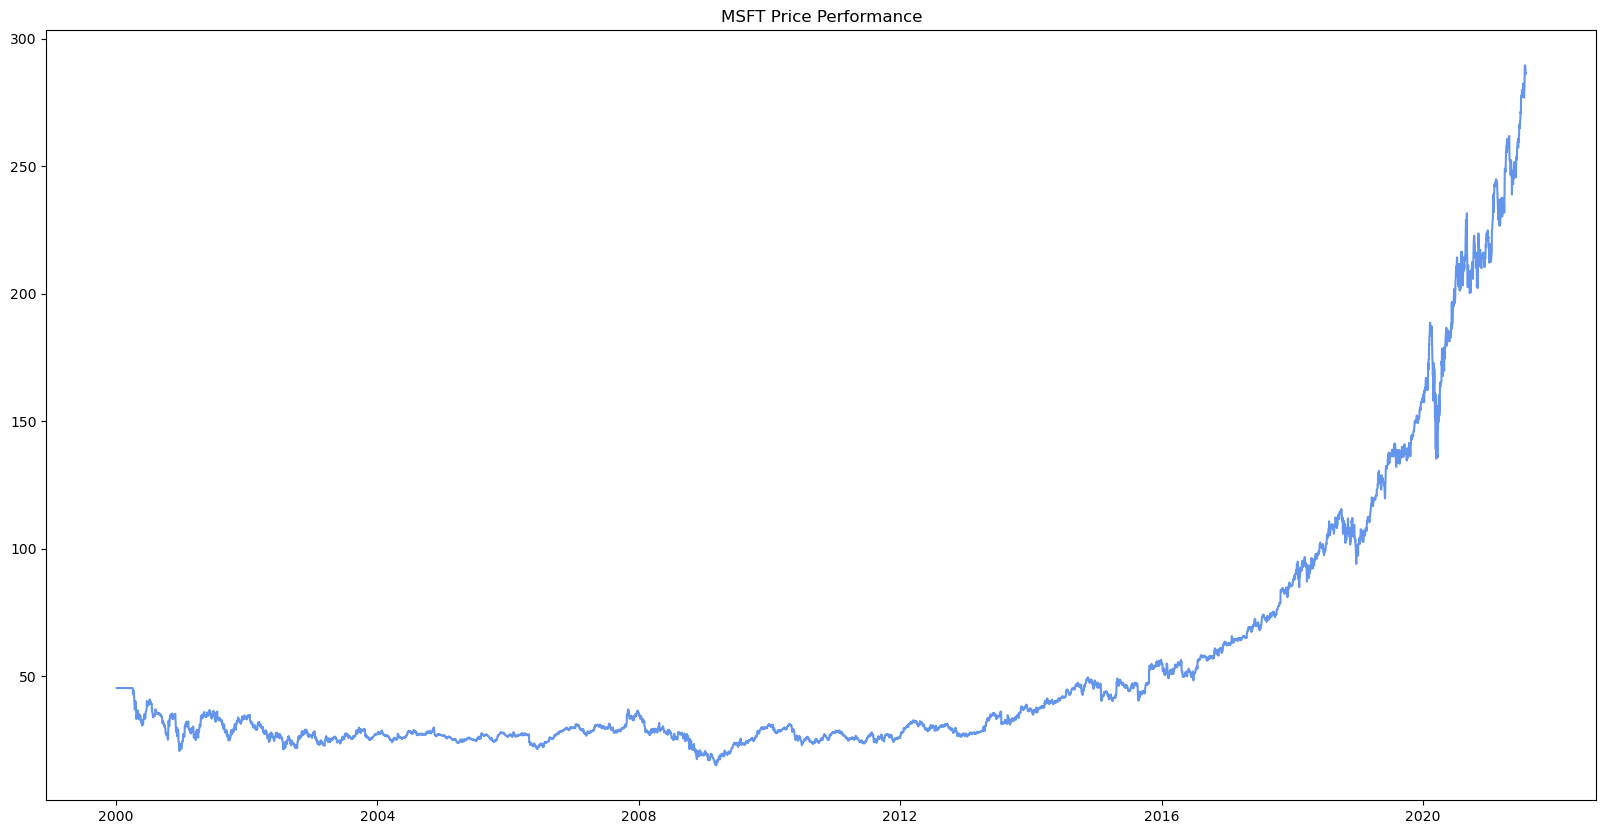

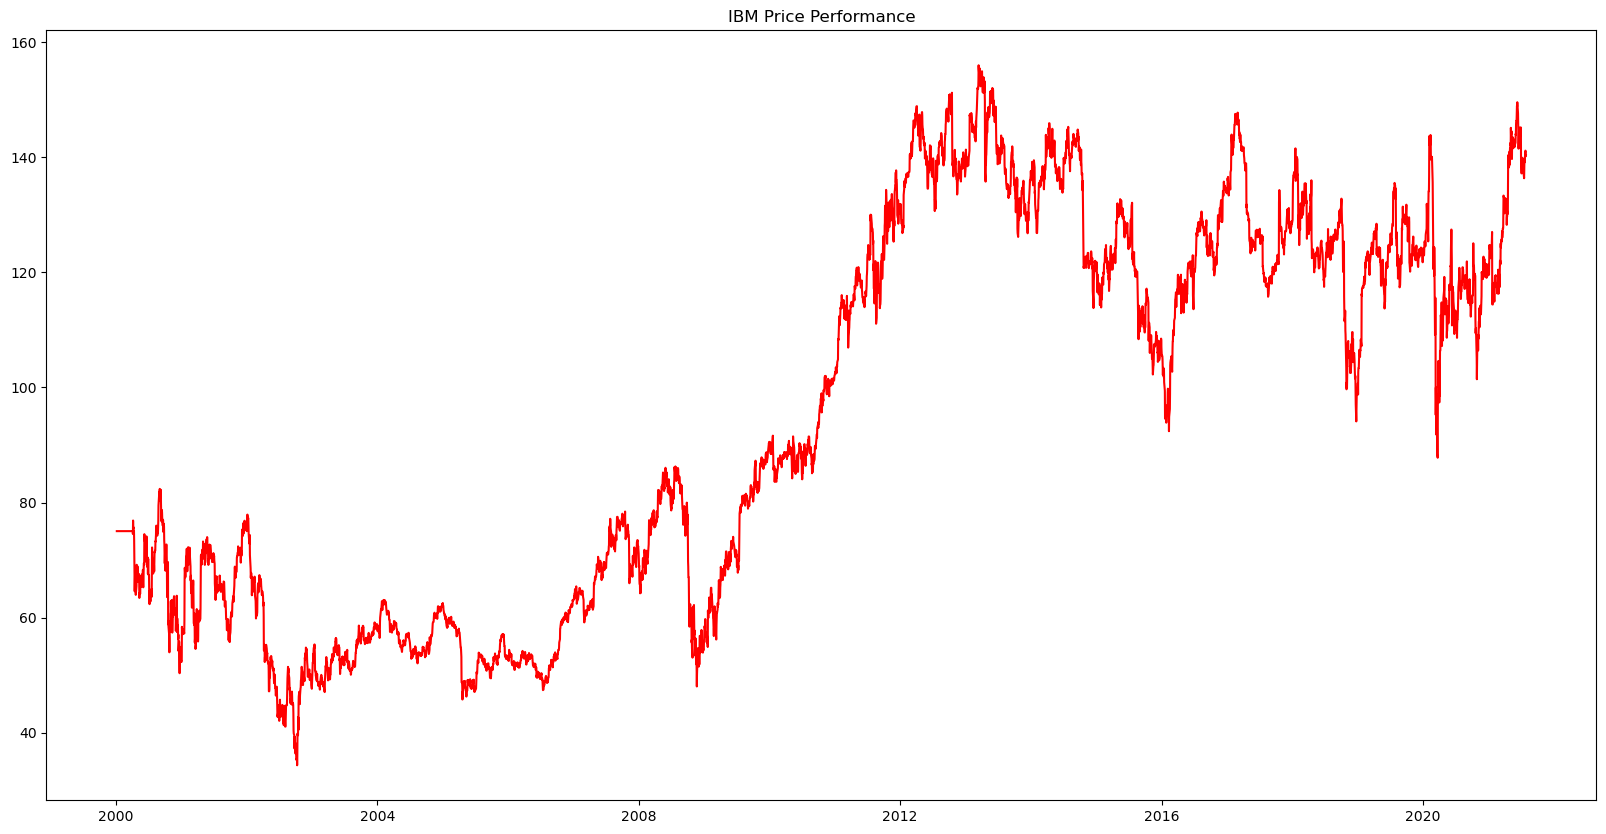

In [12]:
plt.figure(figsize=(20,10))
plt.title('MSFT Price Performance')
plt.plot(msft_df['Close'], color='cornflowerblue'); 
plt.figure(figsize=(20,10))
plt.title('IBM Price Performance')
plt.plot(ibm_df['Adj Close'], color='red');

### Define Label
#### Label or the target variable is also known as the dependent variable. Here, the target variable is whether stock price will close up or down on the next trading day. If the tomorrow’s closing price is greater than 99.50% of today’s closing price with sharpe filter, then we will buy the stock, else we will sell stock.

#### We assign a value of +1 for the buy signal and -1 for the sell signal to the target variable. The target can be described as :

####                                 yt= {+1, if pt+1>0.995*pt}
####                               yt= {-1, Otherwise}


### where, pt is the current closing price of stock and pt+1 is the 1-day forward closing price
.

In [13]:
import pandas as pd
import numpy as np

def add_target_column(df, price_col='Adj Close', target_col='Target', threshold=0.995):

    
    df[target_col] = np.where(df[price_col].shift(-1) > threshold * df[price_col], 1, -1)
    return df

In [20]:
msft_df = add_target_column(msft_df, price_col='Adj Close')

msft_df = add_target_column(msft_df)

# Count days
buy_days = (msft_df['Target'] == 1).sum()
sell_days = (msft_df['Target'] == -1).sum()

print(f"Buy days for msft: {buy_days}")
print(f"Sell days for msft: {sell_days}")


Buy days for msft: 4242
Sell days for msft: 1746


In [22]:
ibm_df = add_target_column(msft_df, price_col='Adj Close')

ibm_df = add_target_column(ibm_df)

# Count days
buy_days = (ibm_df['Target'] == 1).sum()
sell_days = (ibm_df['Target'] == -1).sum()

print(f"Buy days for ibm: {buy_days}")
print(f"Sell days for ibm: {sell_days}")


Buy days for ibm: 4242
Sell days for ibm: 1746


## To predict next 10 days price we will use ARIMA model since daily stock prices are non-seasonal 

In [34]:

m_df = pd.read_csv("C:/Users/Shourya Sharma/Desktop/MSFT_final_data.csv", index_col=0, parse_dates=True)
i_df = pd.read_csv("C:/Users/Shourya Sharma/Desktop/IBM_final_data.csv", index_col=0, parse_dates=True)

In [47]:
len(m_df), len(i_df)


(5988, 5988)

In [48]:
len(date)


7877

In [52]:
import pandas as pd

# Load the data
m_df = pd.read_csv("C:/Users/Shourya Sharma/Desktop/MSFT_final_data.csv", index_col=0, parse_dates=True)
i_df = pd.read_csv("C:/Users/Shourya Sharma/Desktop/IBM_final_data.csv", index_col=0, parse_dates=True)

# Create a date range
date = pd.date_range(start='2000-01-05', end='2021-07-29', freq='D')

# Check the number of rows in the dataframes and the length of the date range
print(len(m_df), len(i_df), len(date))


date = date[:len(m_df)]  # For MSFT
date = date[:len(i_df)] 


m_df['Time_Stamp'] = date
i_df['Time_Stamp'] = date

# Display the first few rows of each dataframe
print(m_df.head())


5988 5988 7877
                Open   High   Low    Close  Adj Close       Volume  \
Date                                                                 
2000-01-05  47.21875  48.25  45.0  45.4375  28.738157  260118200.0   
2000-01-06  47.21875  48.25  45.0  45.4375  28.738157  260118200.0   
2000-01-08  47.21875  48.25  45.0  45.4375  28.738157  260118200.0   
2000-01-09  47.21875  48.25  45.0  45.4375  28.738157  260118200.0   
2000-01-11  47.21875  48.25  45.0  45.4375  28.738157  260118200.0   

            MSFT_std_5  MSFT_std_10  MSFT_std_15  MSFT_std_20  ...  \
Date                                                           ...   
2000-01-05    0.636384     1.659443     2.065879     2.420688  ...   
2000-01-06    0.636384     1.659443     2.065879     2.420688  ...   
2000-01-08    0.636384     1.659443     2.065879     2.420688  ...   
2000-01-09    0.636384     1.659443     2.065879     2.420688  ...   
2000-01-11    0.636384     1.659443     2.065879     2.420688  ...   

   

In [53]:
print(i_df.head())


             Open     High       Low  Close  Adj Close     Volume  IBM_std_5  \
Date                                                                           
2000-01-05  120.0  122.375  119.4375  122.0  75.030159  7715600.0   0.879896   
2000-01-06  120.0  122.375  119.4375  122.0  75.030159  7715600.0   0.879896   
2000-01-08  120.0  122.375  119.4375  122.0  75.030159  7715600.0   0.879896   
2000-01-09  120.0  122.375  119.4375  122.0  75.030159  7715600.0   0.879896   
2000-01-11  120.0  122.375  119.4375  122.0  75.030159  7715600.0   0.879896   

            IBM_std_10  IBM_std_15  IBM_std_20  ...  IBM_MACD_Signal_Daily  \
Date                                            ...                          
2000-01-05    4.006237    4.704275    4.156709  ...                -0.7329   
2000-01-06    4.006237    4.704275    4.156709  ...                -0.6414   
2000-01-08    4.006237    4.704275    4.156709  ...                -0.0429   
2000-01-09    4.006237    4.704275    4.156709  .

In [54]:
m_df.set_index('Time_Stamp',inplace=True)
m_df.head()

,Open,High,Low,Close,Adj Close,Volume,MSFT_std_5,MSFT_std_10,MSFT_std_15,MSFT_std_20,...,MSFT_WMA_Daily,MSFT_MACD_Daily,MSFT_MACD_Hist_Daily,MSFT_MACD_Signal_Daily,MSFT_RSI_Daily,MSFT_FastD_Daily,MSFT_FastK_Daily,MSFT_Real Middle Band_Daily,MSFT_Real Lower Band_Daily,MSFT_Real Upper Band_Daily
Time_Stamp,,,,,,,,,,,,,,,,,,,,,
2000-01-05,47.21875,48.25,45.0,45.4375,28.738157,260118200.0,0.636384,1.659443,2.065879,2.420688,...,27.8827,-2.1639,-0.1174,-2.0465,44.2425,78.6947,100.0000,29.3661,21.9360,36.7962
2000-01-06,47.21875,48.25,45.0,45.4375,28.738157,260118200.0,0.636384,1.659443,2.065879,2.420688,...,23.2628,-1.1889,0.1476,-1.3364,42.8274,70.5380,100.0000,25.7901,16.0282,35.5520
2000-01-07,47.21875,48.25,45.0,45.4375,28.738157,260118200.0,0.636384,1.659443,2.065879,2.420688,...,23.3967,-0.5869,-0.3211,-0.2658,45.3095,78.3775,51.8769,22.7999,19.0514,26.5483
2000-01-08,47.21875,48.25,45.0,45.4375,28.738157,260118200.0,0.636384,1.659443,2.065879,2.420688,...,23.0354,-0.2078,-0.0030,-0.2047,46.4495,9.9725,29.9175,23.3787,20.6657,26.0916
2000-01-09,47.21875,48.25,45.0,45.4375,28.738157,260118200.0,0.636384,1.659443,2.065879,2.420688,...,19.7391,0.6109,0.5788,0.0320,50.4106,99.2262,100.0000,20.5456,16.3882,24.7030


In [55]:
i_df.set_index('Time_Stamp',inplace=True)
i_df.head()

,Open,High,Low,Close,Adj Close,Volume,IBM_std_5,IBM_std_10,IBM_std_15,IBM_std_20,...,IBM_WMA_Daily,IBM_MACD_Signal_Daily,IBM_MACD_Hist_Daily,IBM_MACD_Daily,IBM_RSI_Daily,IBM_FastK_Daily,IBM_FastD_Daily,IBM_Real Lower Band_Daily,IBM_Real Upper Band_Daily,IBM_Real Middle Band_Daily
Time_Stamp,,,,,,,,,,,,,,,,,,,,,
2000-01-05,120.0,122.375,119.4375,122.0,75.030159,7715600.0,0.879896,4.006237,4.704275,4.156709,...,70.3644,-0.7329,-0.1266,-0.8595,51.5371,72.9945,77.5408,62.1567,78.2202,70.1884
2000-01-06,120.0,122.375,119.4375,122.0,75.030159,7715600.0,0.879896,4.006237,4.704275,4.156709,...,68.4971,-0.6414,0.1660,-0.4753,49.4834,0.0000,39.1092,61.7418,77.0611,69.4015
2000-01-07,120.0,122.375,119.4375,122.0,75.030159,7715600.0,0.879896,4.006237,4.704275,4.156709,...,68.7452,-0.0429,0.3165,0.2737,50.4539,22.8562,65.3216,62.3168,74.9211,68.6190
2000-01-08,120.0,122.375,119.4375,122.0,75.030159,7715600.0,0.879896,4.006237,4.704275,4.156709,...,73.7584,2.5397,0.4881,3.0277,57.9355,96.0925,69.7211,62.0197,82.0881,72.0539
2000-01-09,120.0,122.375,119.4375,122.0,75.030159,7715600.0,0.879896,4.006237,4.704275,4.156709,...,69.2080,-4.0473,0.2254,-3.8219,45.5861,100.0000,98.4035,57.1552,88.3059,72.7306


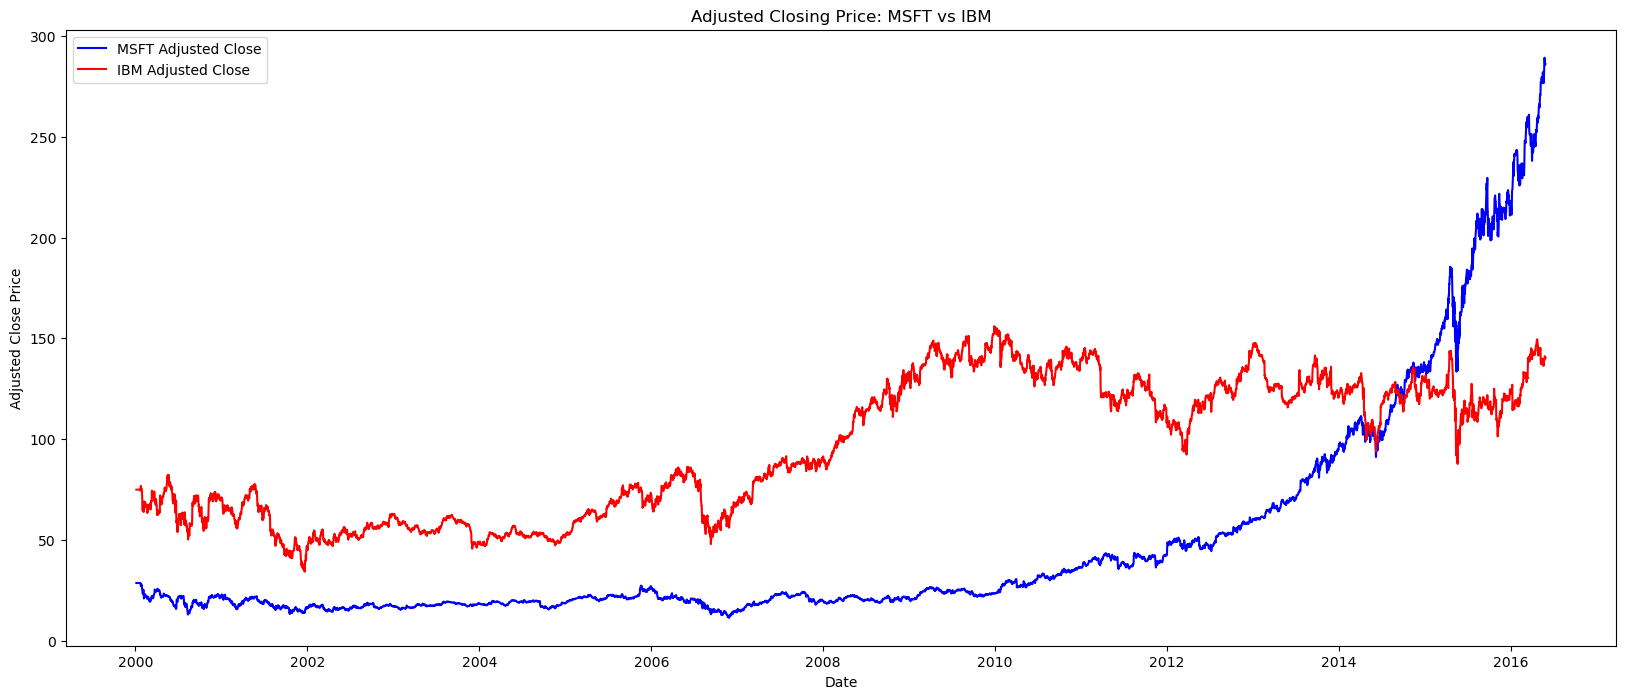

In [61]:
plt.plot(m_df.index, m_df['Adj Close'], label="MSFT Adjusted Close", color='blue')

# Plot the Adj Close for IBM
plt.plot(i_df.index, i_df['Adj Close'], label="IBM Adjusted Close", color='red')

# Adding labels and title
plt.title('Adjusted Closing Price: MSFT vs IBM')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()

In [65]:
m_df['Adj Close'].describe()

count    5988.000000
mean       48.202513
std        54.560473
min        11.532787
25%        19.021410
50%        22.448439
75%        48.202798
max       289.116516
Name: Adj Close, dtype: float64

In [66]:
i_df['Adj Close'].describe()

count    5988.000000
mean       95.386539
std        33.684856
min        34.345161
25%        61.201861
50%        96.863941
75%       125.790930
max       155.979538
Name: Adj Close, dtype: float64

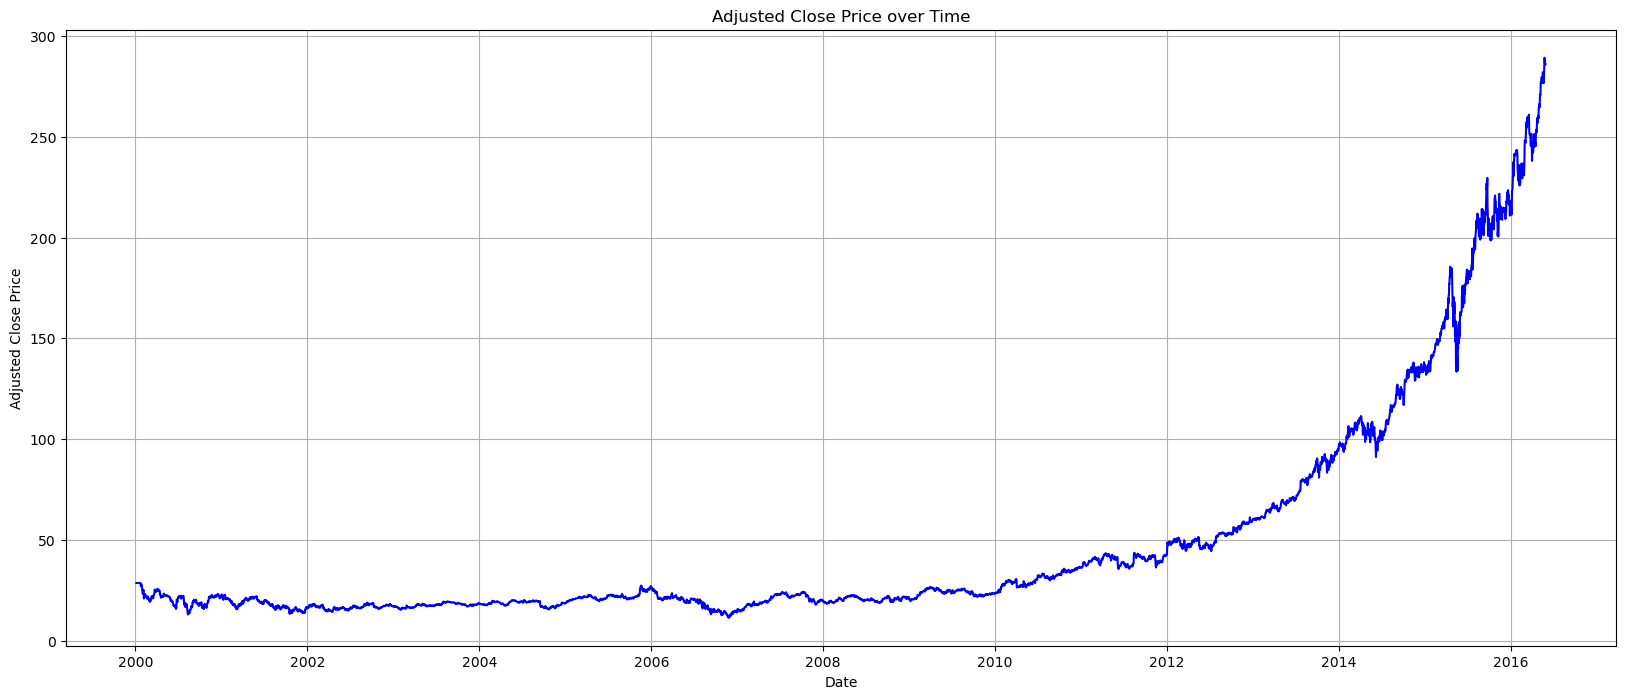

In [71]:
import matplotlib.pyplot as plt

# Plotting the Adjusted Close price over time (daily)
plt.figure(figsize=(20, 8))
plt.plot(m_df.index, m_df['Adj Close'], label='Adjusted Close Price', color='blue')

# Adding labels and title
plt.title('Adjusted Close Price over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')

# Adding a grid
plt.grid(True)

# Display the plot
plt.show()


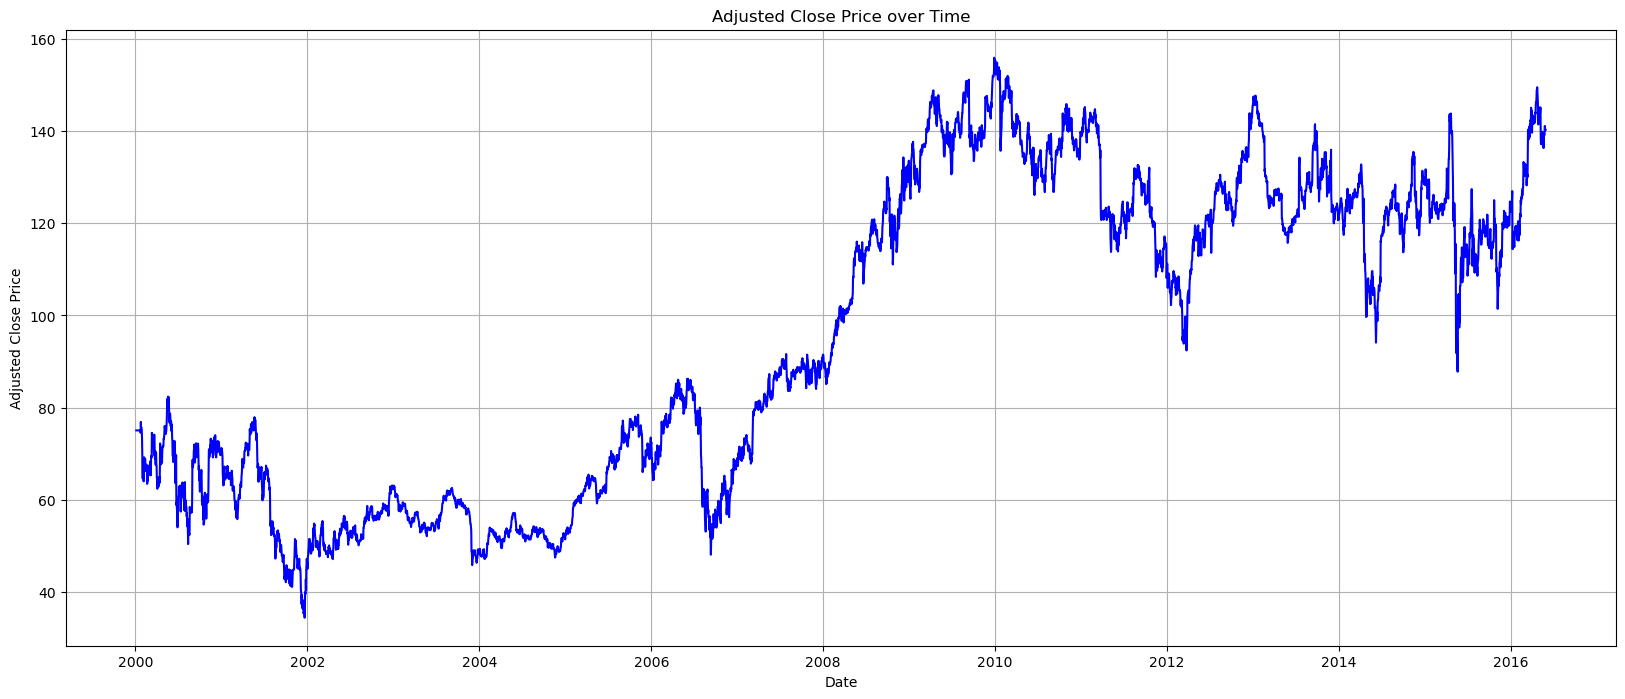

In [73]:
import matplotlib.pyplot as plt

# Plotting the Adjusted Close price over time (daily)
plt.figure(figsize=(20, 8))
plt.plot(i_df.index, i_df['Adj Close'], label='Adjusted Close Price', color='blue')

# Adding labels and title
plt.title('Adjusted Close Price over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')

# Adding a grid
plt.grid(True)

# Display the plot
plt.show()


In [75]:
# Create a pivot table for Adjusted Close Price across months and years
monthly_price_across_years = pd.pivot_table(m_df, values = 'Adj Close', columns = m_df.index.month, index = m_df.index.year)

# Display the pivot table
print(monthly_price_across_years)


Time_Stamp          1           2           3           4           5   \
Time_Stamp                                                               
2000         28.114464   22.163945   22.463759   23.520884   22.100339   
2001         21.537053   18.983447   17.589175   20.282997   21.561331   
2002         17.522969   17.108042   15.966054   15.444192   16.046970   
2003         16.662065   16.324337   16.630780   17.749617   17.741448   
2004         18.141253   18.638516   19.333098   18.047641   19.580334   
2005         19.836866   21.068963   21.717982   22.126491   20.695609   
2006         24.408718   20.908841   21.712747   21.602931   20.332661   
2007         15.283126   17.633670   18.132738   18.995310   20.286645   
2008         19.117944   19.467533   20.626005   21.932714   22.114993   
2009         20.662486   23.205313   25.628017   25.895614   24.739340   
2010         24.854266   28.797758   29.393011   27.302649   27.881484   
2011         37.754876   40.048527   3

In [76]:
# Create a pivot table for Adjusted Close Price across months and years
monthly_price_across_years = pd.pivot_table(i_df, values = 'Adj Close', columns = i_df.index.month, index = i_df.index.year)

# Display the pivot table
print(monthly_price_across_years)


Time_Stamp          1           2           3           4           5   \
Time_Stamp                                                               
2000         74.621575   66.549971   69.964445   67.397103   77.558916   
2001         66.267986   63.401257   61.037304   70.311650   75.543978   
2002         50.315584   50.511291   50.429630   49.505553   51.901003   
2003         60.434655   58.352671   55.446867   55.560106   53.762838   
2004         48.080637   52.234992   51.915281   51.638483   54.779381   
2005         53.540094   59.477550   61.303282   64.189650   61.993035   
2006         68.175293   73.596492   78.221208   83.145115   81.600212   
2007         69.973185   71.473720   77.521116   80.749222   83.017964   
2008         88.219012   94.569525  100.006722  101.542799  111.263066   
2009        132.039963  132.202755  139.916530  145.562429  141.867427   
2010        149.217426  149.022936  143.511645  139.585255  136.564823   
2011        141.149746  142.632769  13

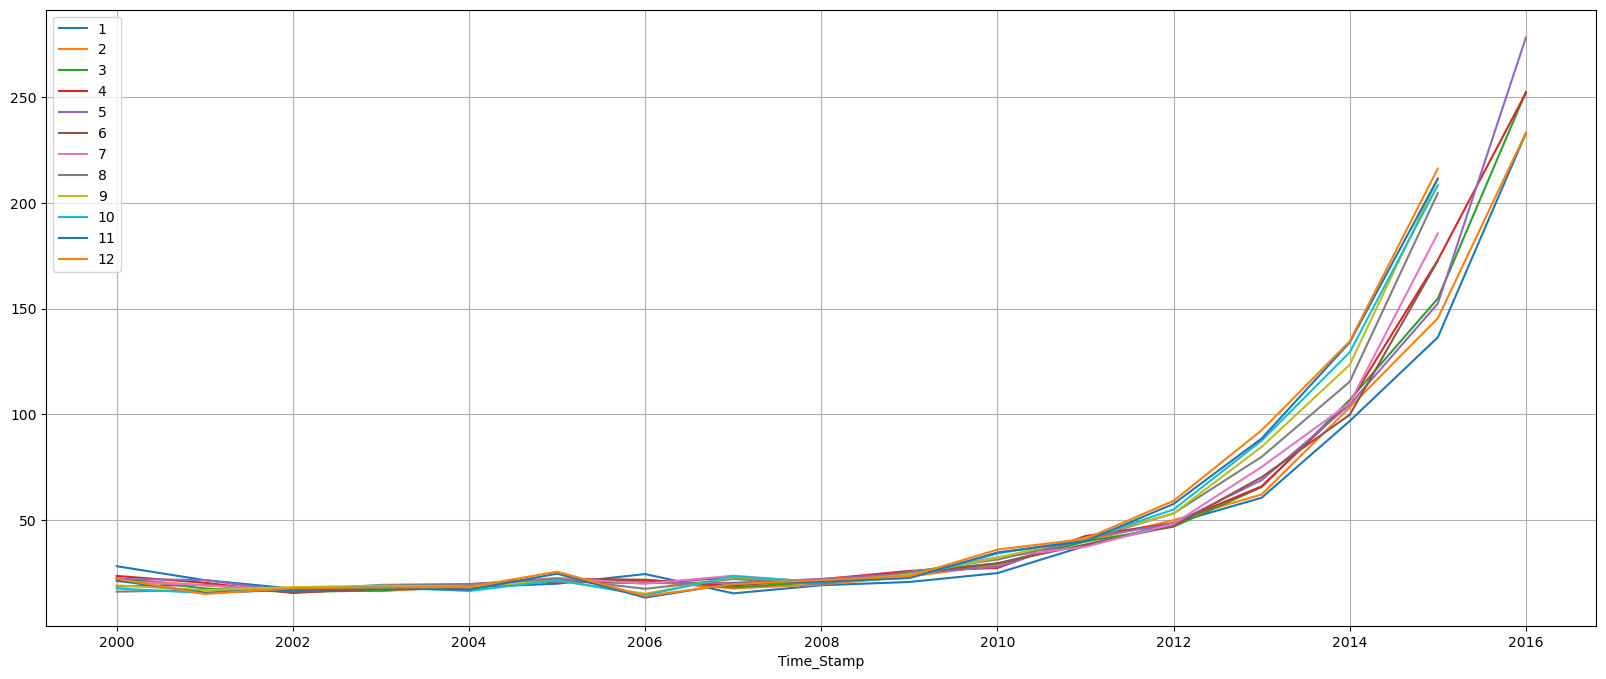

In [77]:
import matplotlib.pyplot as plt

# Create a pivot table for Adjusted Close Price across months and years
monthly_price_across_years = pd.pivot_table(m_df, values='Adj Close', columns=m_df.index.month, index=m_df.index.year)

# Plot the monthly adjusted close price across years
monthly_price_across_years.plot()

# Add grid to the plot
plt.grid()

# Add a legend to the plot (it will show months as labels)
plt.legend(loc='best')

# Display the plot
plt.show()


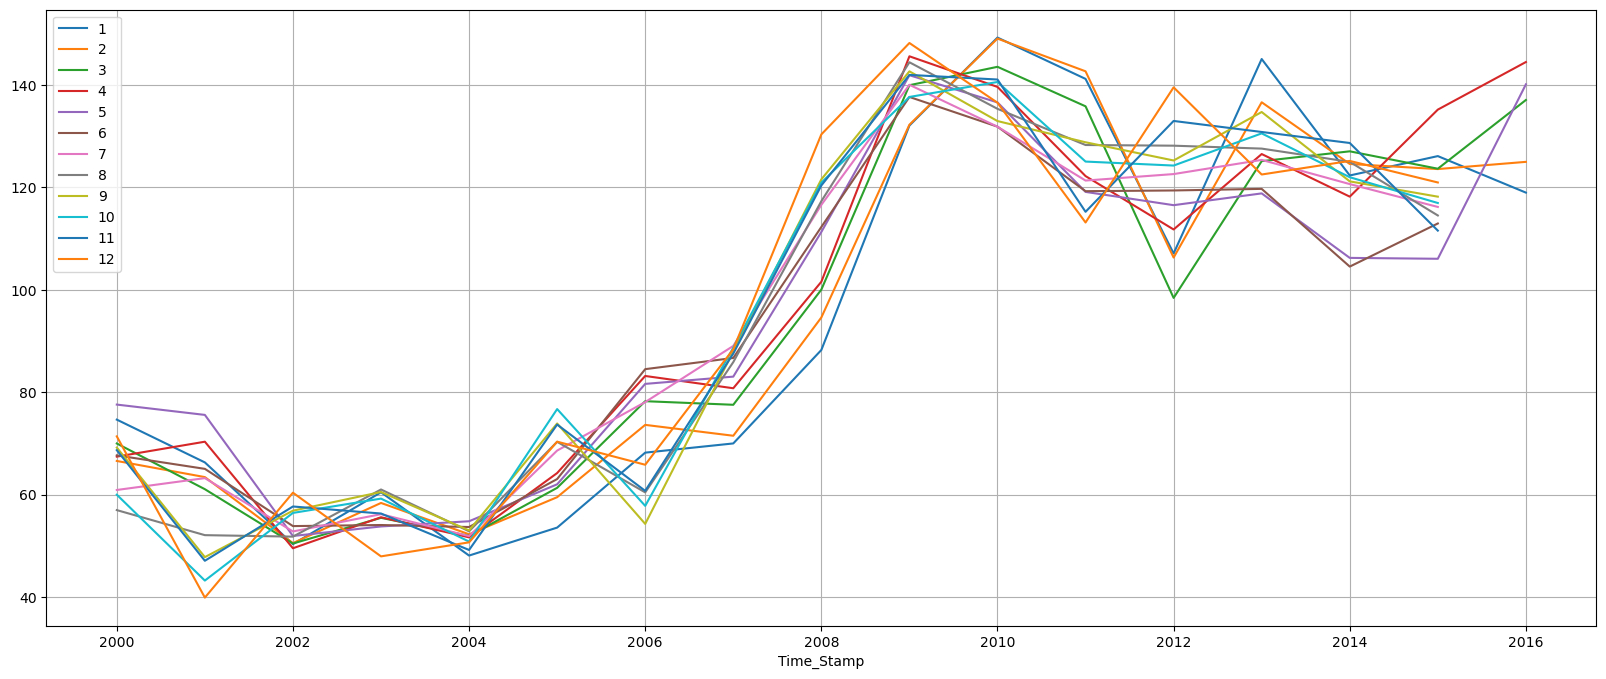

In [78]:
import matplotlib.pyplot as plt

# Create a pivot table for Adjusted Close Price across months and years
monthly_price_across_years = pd.pivot_table(i_df, values='Adj Close', columns=i_df.index.month, index=i_df.index.year)

# Plot the monthly adjusted close price across years
monthly_price_across_years.plot()

# Add grid to the plot
plt.grid()

# Add a legend to the plot (it will show months as labels)
plt.legend(loc='best')

# Display the plot
plt.show()


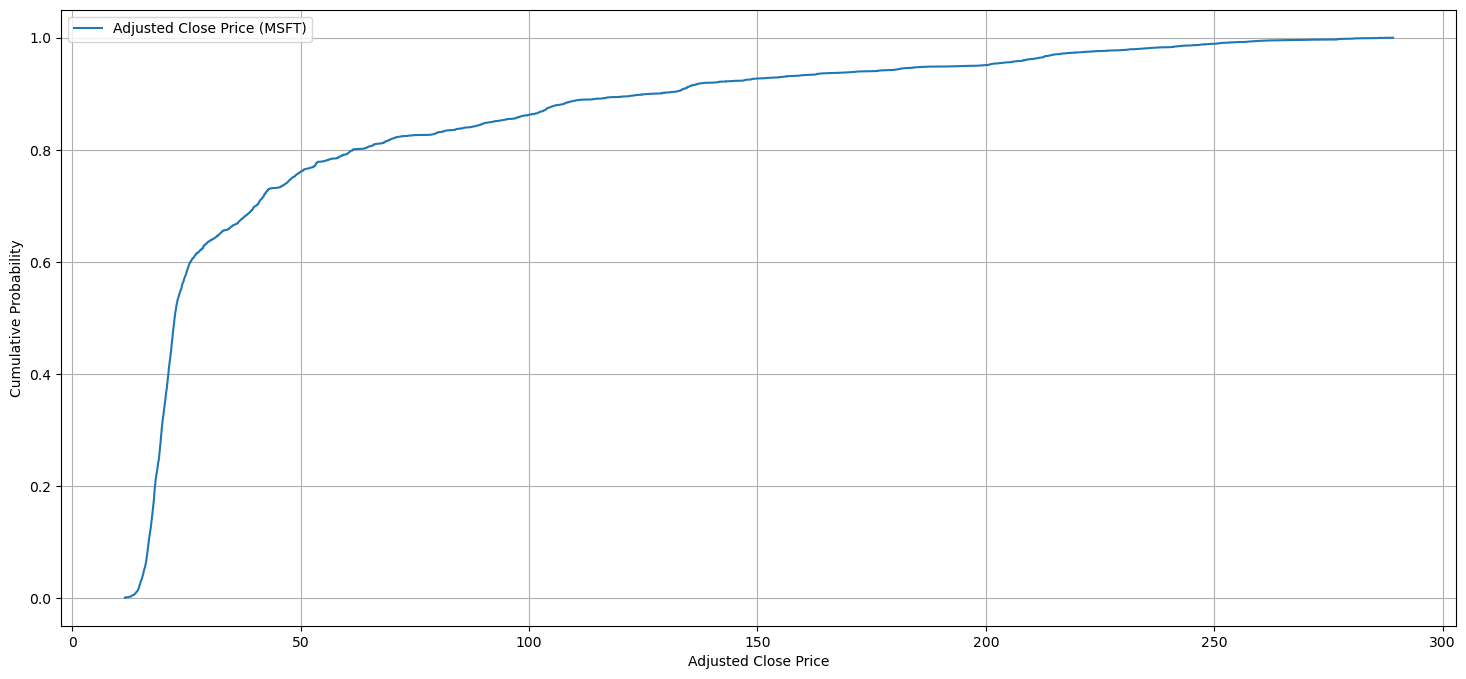

In [82]:
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

# Create ECDF for the Adjusted Close Price
plt.figure(figsize = (18, 8))
cdf = ECDF(m_df['Adj Close'])
plt.plot(cdf.x, cdf.y, label="Adjusted Close Price (MSFT)")

# Add grid and labels to the plot
plt.grid()
plt.xlabel('Adjusted Close Price')
plt.ylabel('Cumulative Probability')

# Add a legend
plt.legend(loc='best')

# Show the plot
plt.show()


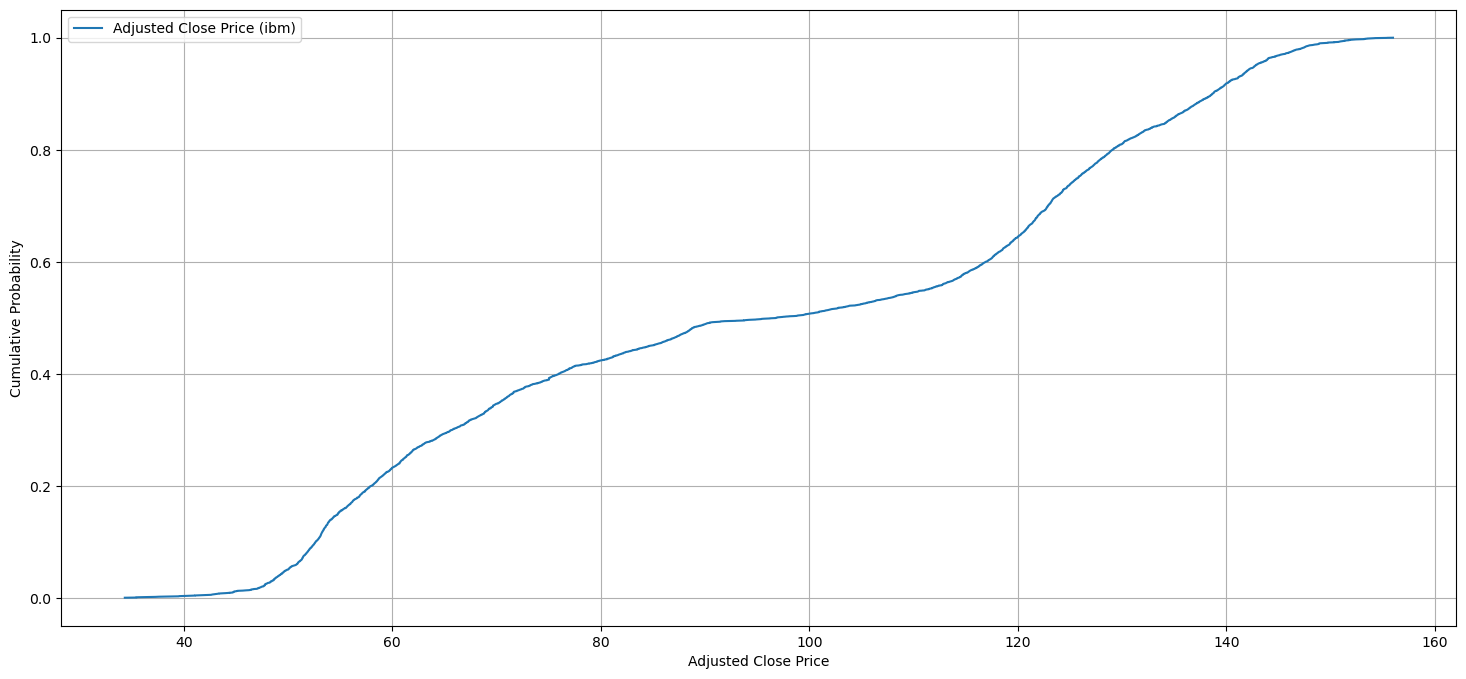

In [83]:
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

# Create ECDF for the Adjusted Close Price
plt.figure(figsize = (18, 8))
cdf = ECDF(i_df['Adj Close'])
plt.plot(cdf.x, cdf.y, label="Adjusted Close Price (ibm)")

# Add grid and labels to the plot
plt.grid()
plt.xlabel('Adjusted Close Price')
plt.ylabel('Cumulative Probability')

# Add a legend
plt.legend(loc='best')

# Show the plot
plt.show()


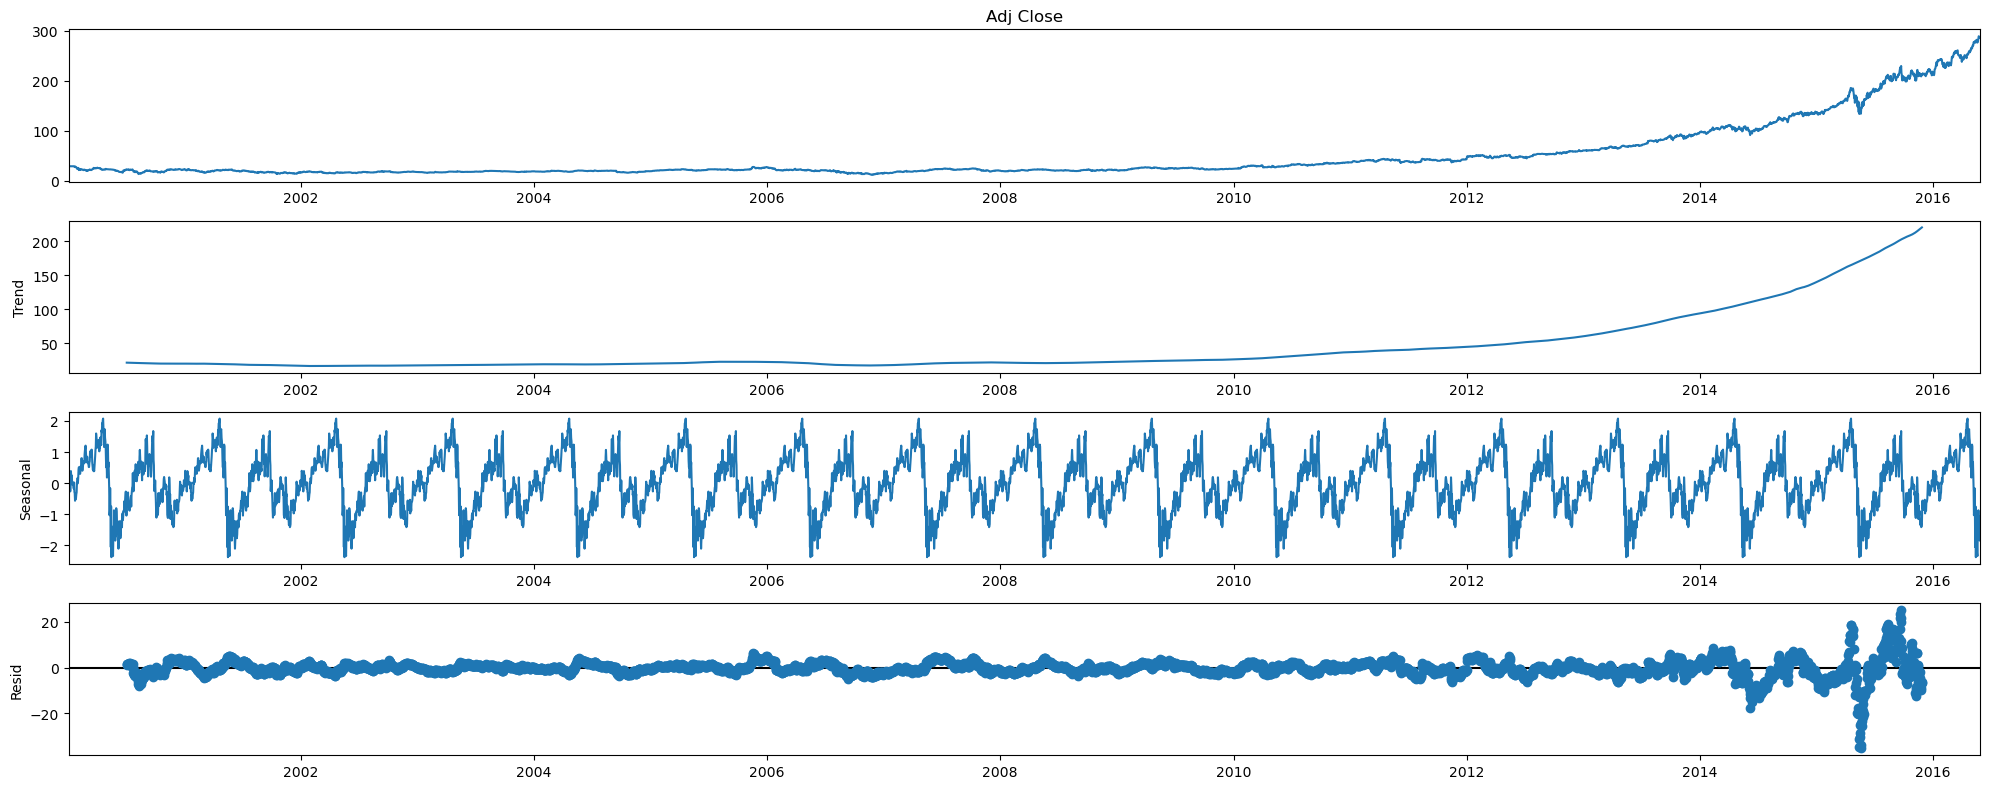

In [85]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Apply seasonal decomposition for Adjusted Close Price
decomposition = seasonal_decompose(m_df['Adj Close'], model='additive', period=365)  # period=365 for yearly seasonality (can be adjusted)

# Plot the decomposition
decomposition.plot()
plt.show()


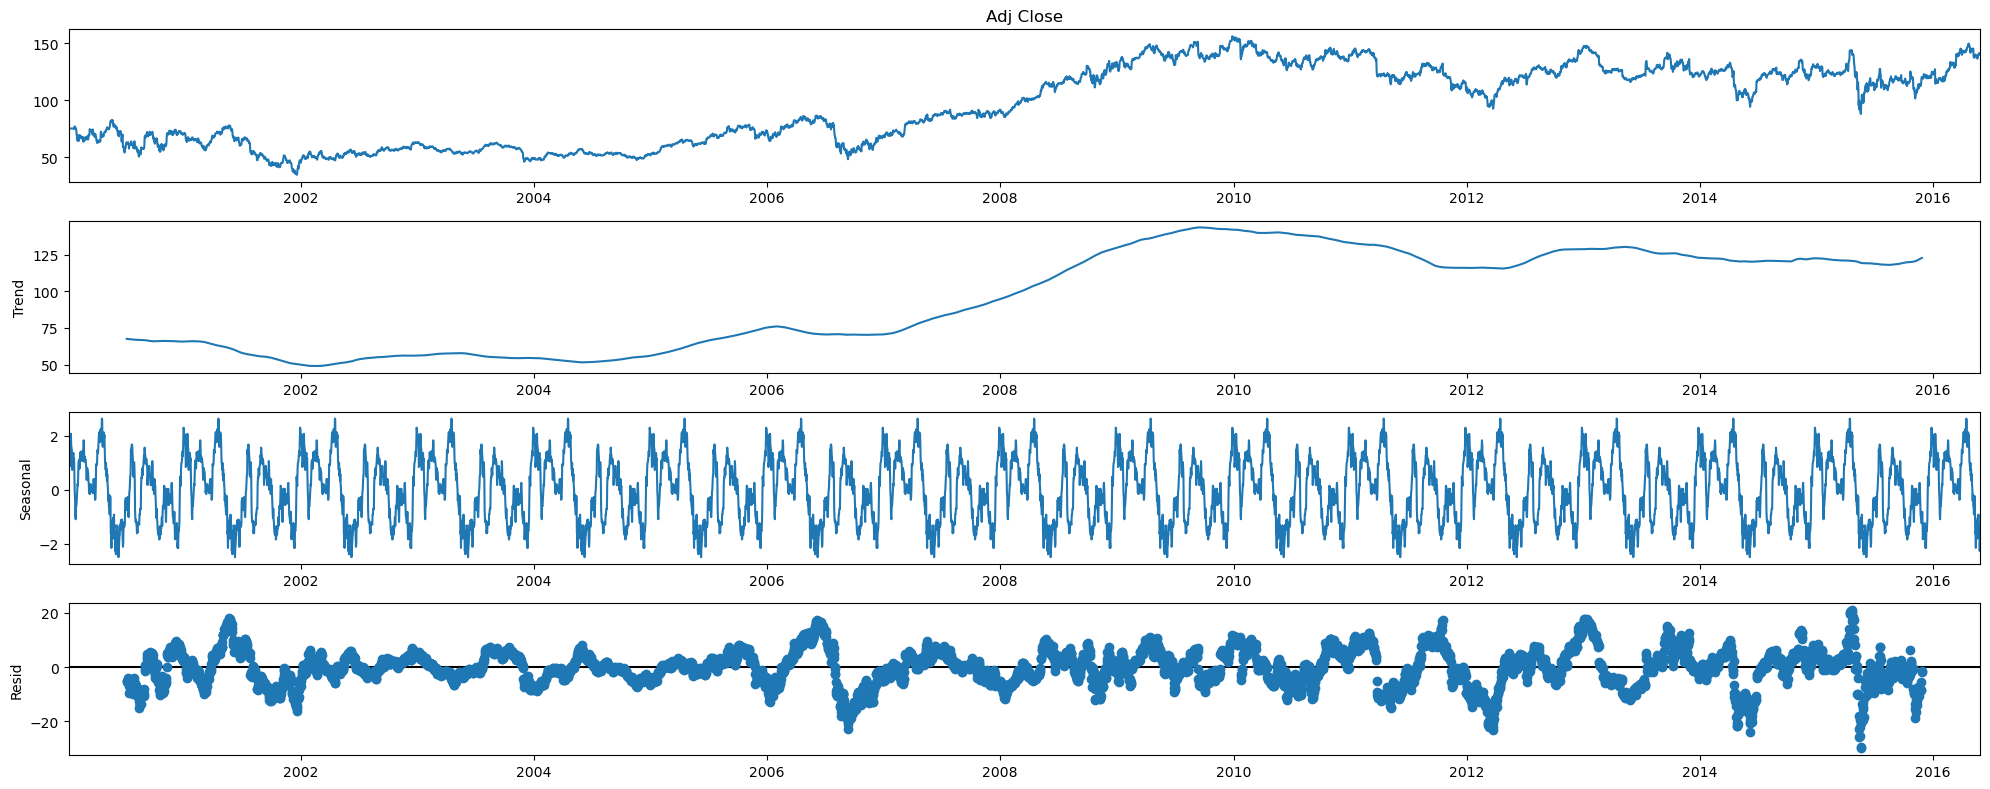

In [86]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Apply seasonal decomposition for Adjusted Close Price
decomposition = seasonal_decompose(i_df['Adj Close'], model='additive', period=365)  # period=365 for yearly seasonality (can be adjusted)

# Plot the decomposition
decomposition.plot()
plt.show()


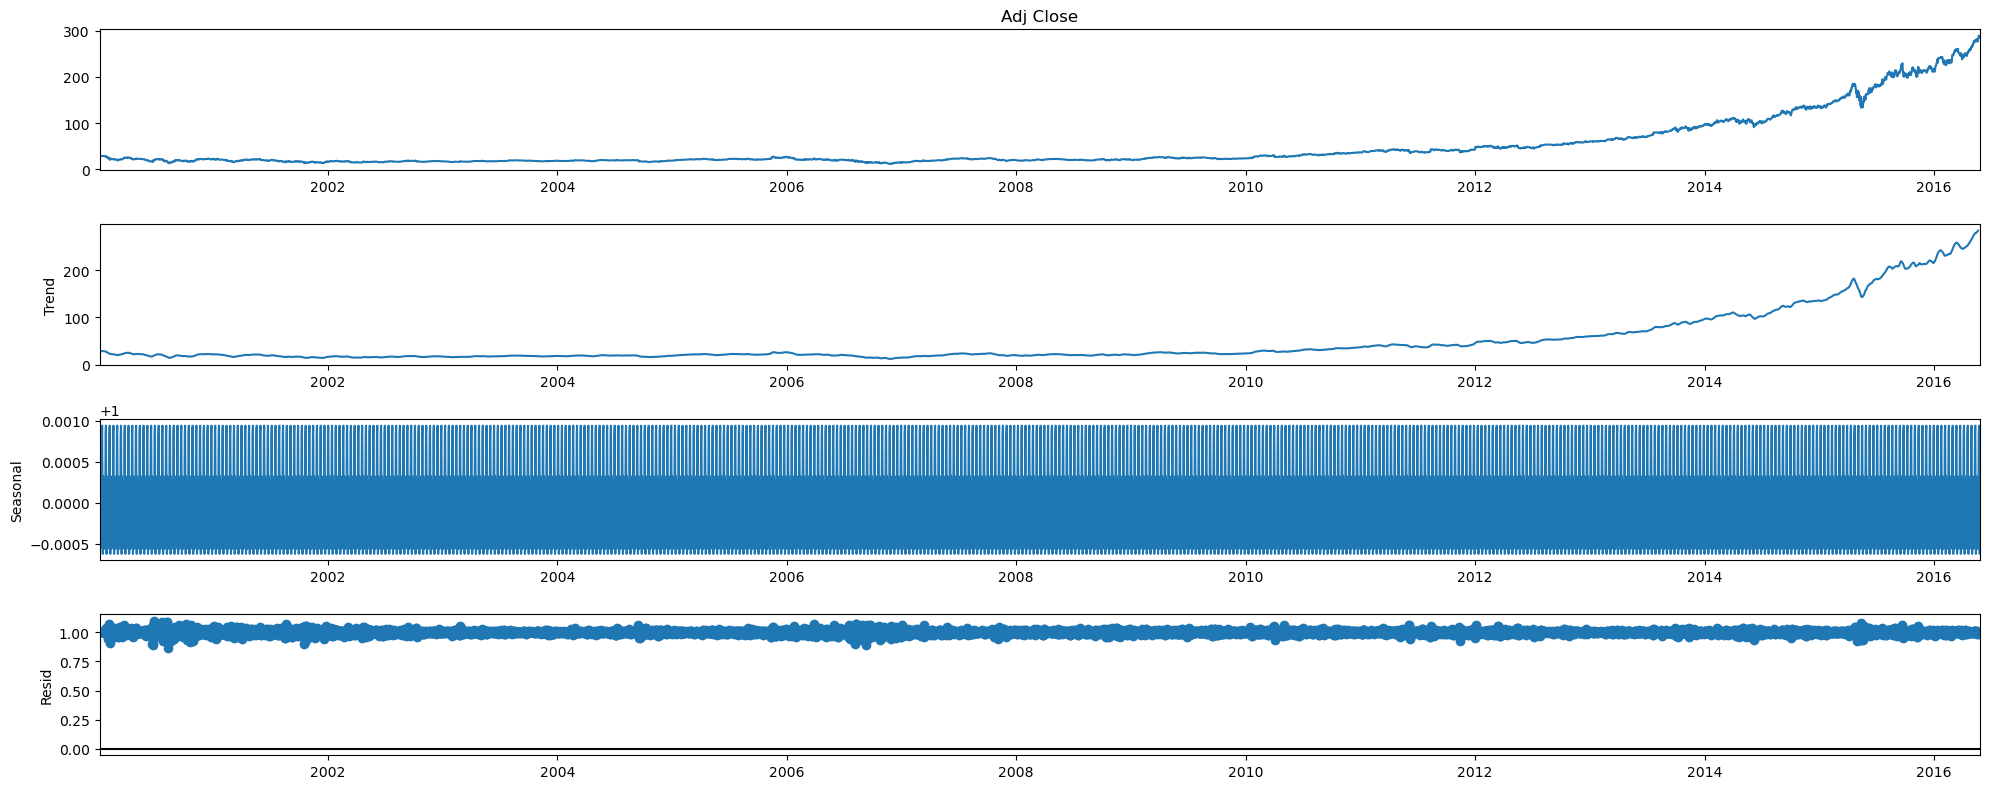

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
decomposition = seasonal_decompose(m_df['Adj Close'], model='multiplicative', period=12)
decomposition.plot()
plt.show()

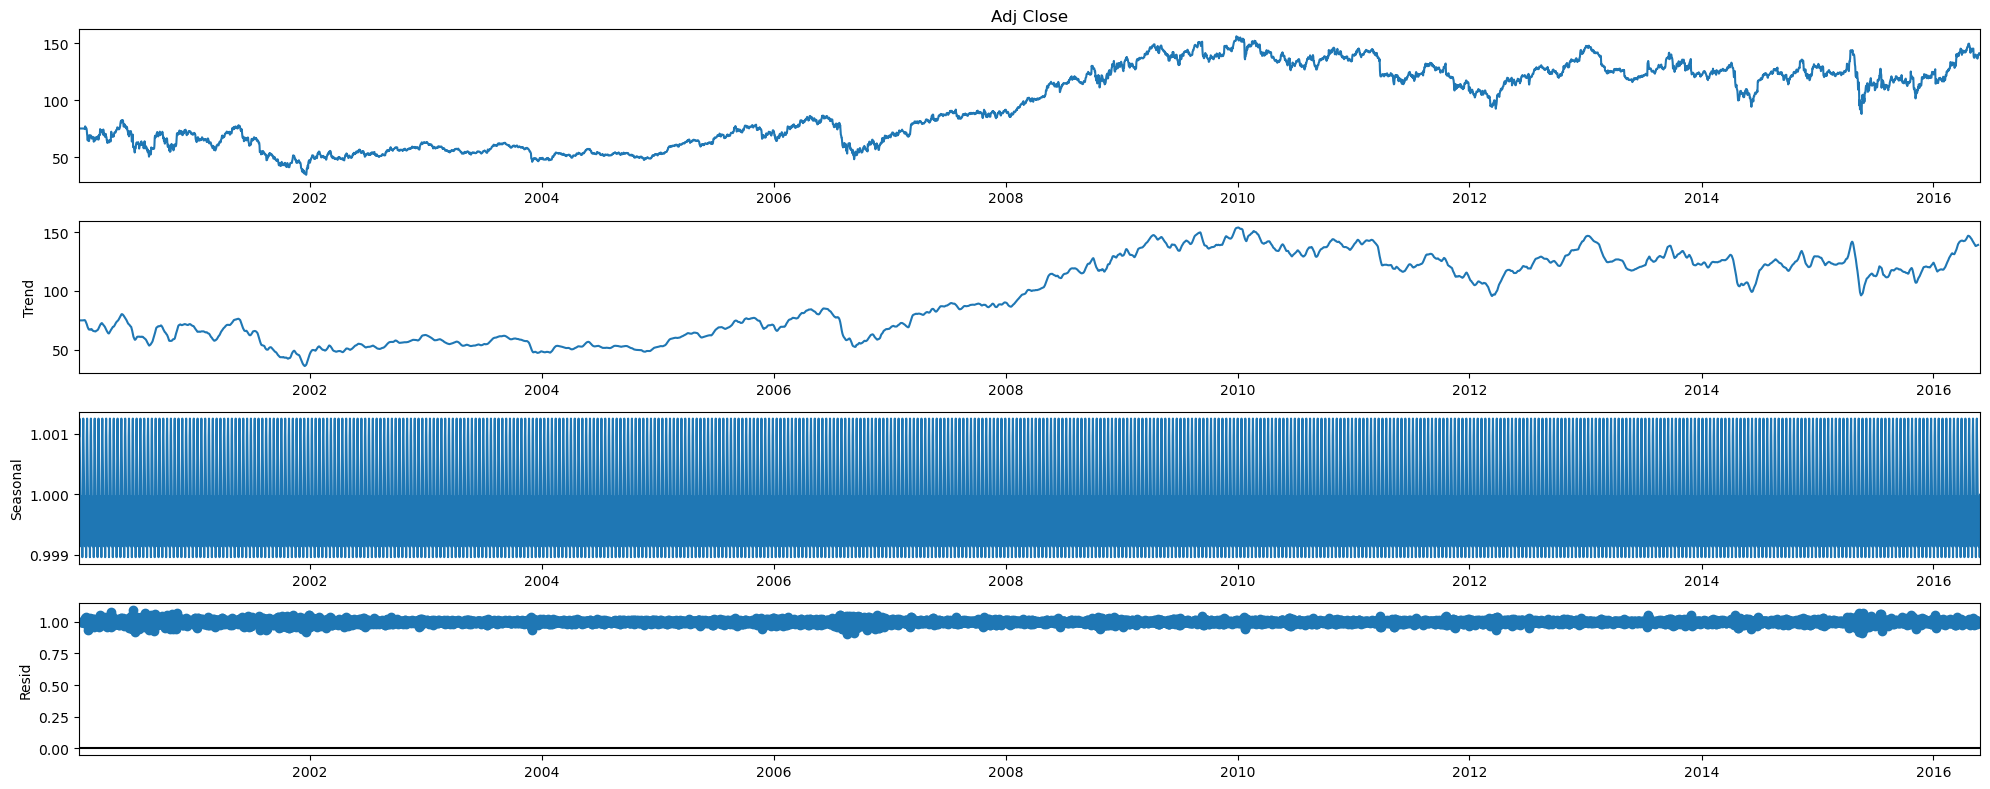

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
decomposition = seasonal_decompose(i_df['Adj Close'], model='multiplicative', period=12)
decomposition.plot()
plt.show()

In [89]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
2000-01-05          NaN
2000-01-06          NaN
2000-01-07          NaN
2000-01-08          NaN
2000-01-09          NaN
2000-01-10          NaN
2000-01-11    75.030159
2000-01-12    75.030159
2000-01-13    75.030159
2000-01-14    75.030159
2000-01-15    75.030159
2000-01-16    75.030159
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2000-01-05    1.000962
2000-01-06    1.001254
2000-01-07    1.000777
2000-01-08    1.000155
2000-01-09    0.999728
2000-01-10    0.999451
2000-01-11    0.999136
2000-01-12    0.999755
2000-01-13    0.999869
2000-01-14    0.999963
2000-01-15    0.998956
2000-01-16    0.999992
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-08         NaN
2000-01-09         NaN
2000-01-10         NaN
2000-01-11    1.000865
2000-01-12    1.000245
2000-01-13    1.000131
2000-01-14    1.000037
2000-01-15    1.001045
2000-01-16    1.000008
Name: resid, dtype: float64 



## Check for stationarity of the whole Time Series data.

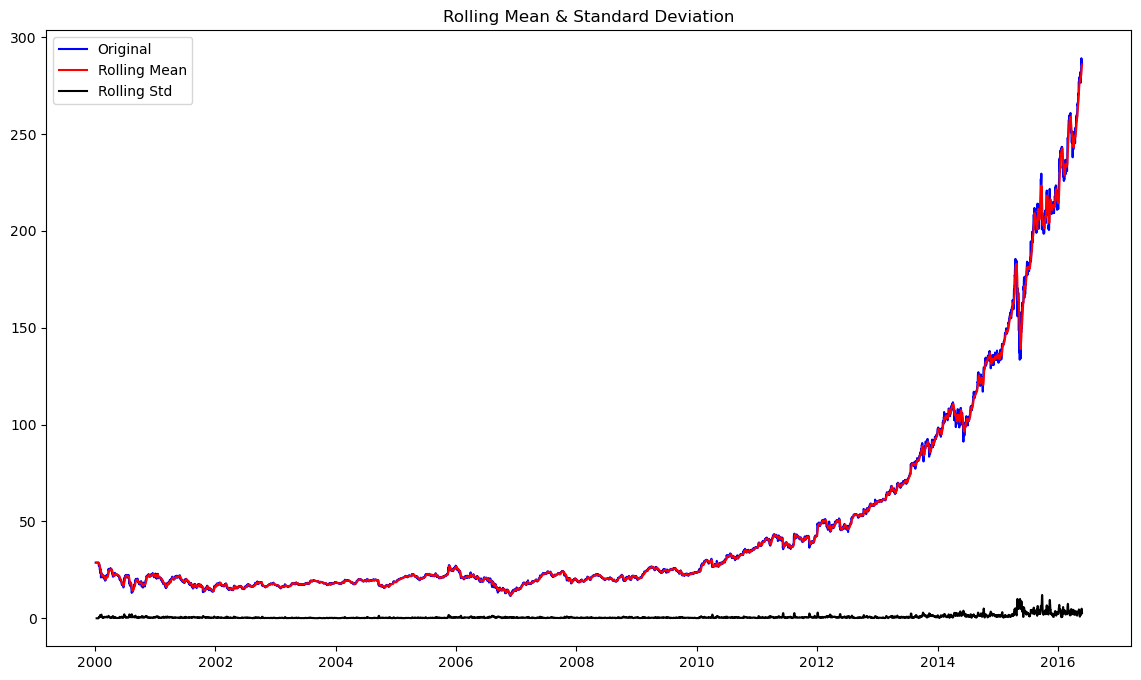

Results of Dickey-Fuller Test:
Test Statistic                    9.022510
p-value                           1.000000
#Lags Used                       32.000000
Number of Observations Used    5955.000000
Critical Value (1%)              -3.431449
Critical Value (5%)              -2.862025
Critical Value (10%)             -2.567028
dtype: float64 



In [90]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd

def test_stationarity(timeseries):
    # Determine rolling statistics (rolling mean and standard deviation)
    rolmean = timeseries.rolling(window=7).mean()  # Rolling mean
    rolstd = timeseries.rolling(window=7).std()    # Rolling standard deviation

    # Plot rolling statistics
    plt.figure(figsize=(14, 8))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    
    print(dfoutput, '\n')

# Apply the test to the 'Adj Close' column of m_df (Microsoft stock data)
test_stationarity(m_df['Adj Close'])


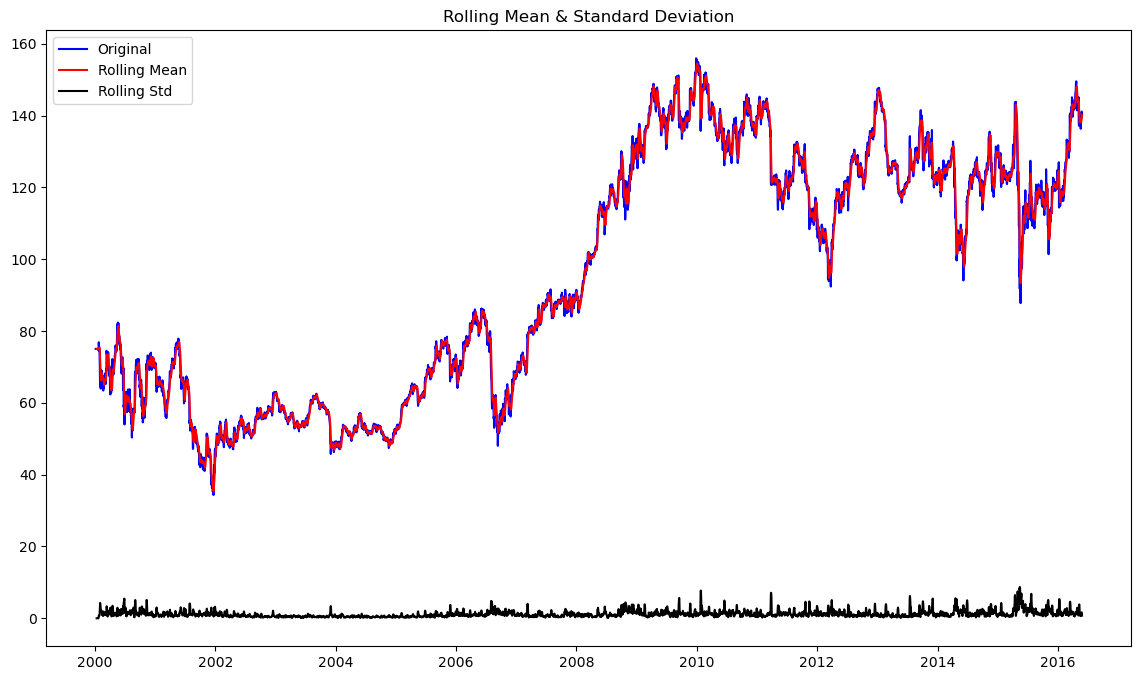

Results of Dickey-Fuller Test:
Test Statistic                   -1.329109
p-value                           0.615752
#Lags Used                        1.000000
Number of Observations Used    5986.000000
Critical Value (1%)              -3.431443
Critical Value (5%)              -2.862023
Critical Value (10%)             -2.567027
dtype: float64 



In [93]:


def test_stationarity(timeseries):
    # Determine rolling statistics (rolling mean and standard deviation)
    rolmean = timeseries.rolling(window=7).mean()  # Rolling mean
    rolstd = timeseries.rolling(window=7).std()    # Rolling standard deviation

    # Plot rolling statistics
    plt.figure(figsize=(14, 8))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    
    print(dfoutput, '\n')

# Apply the test to the 'Adj Close' column of m_df (Microsoft stock data)
test_stationarity(i_df['Adj Close'])


## Let us take a difference of order 1 and check whether the Time Series is stationary or not.

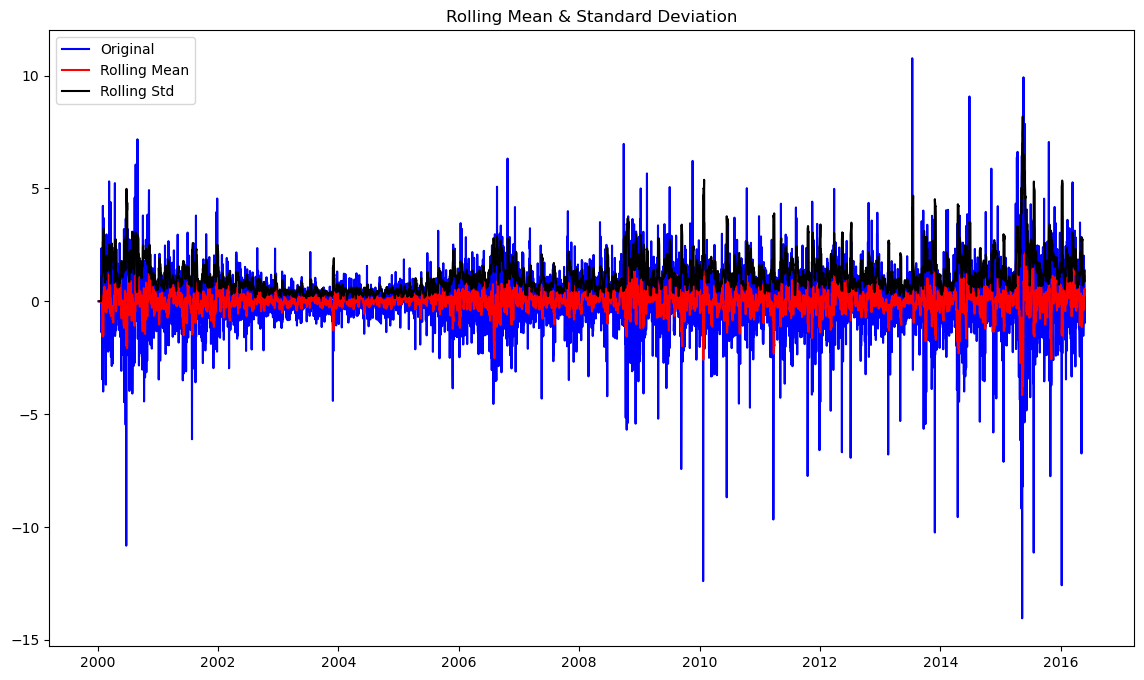

Results of Dickey-Fuller Test:
Test Statistic                  -79.610451
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    5986.000000
Critical Value (1%)              -3.431443
Critical Value (5%)              -2.862023
Critical Value (10%)             -2.567027
dtype: float64 



In [96]:
test_stationarity(i_df['Adj Close'].diff().dropna())

### At alpha 0.5 the data is stationary. 
## Plot ACF & PACF (For p and q)

In [109]:
train_m=m_df[m_df.index.year < 2011]
test_m=m_df[m_df.index.year >= 2011]

In [110]:
train_i=i_df[i_df.index.year < 2011]
test_i=i_df[i_df.index.year >= 2011]

In [111]:
from IPython.display import display

In [112]:
print('First few rows of Training Data')
display(train_m.head())
print('Last few rows of Training Data')
display(train_m.tail())
print('First few rows of Test Data')
display(test_m.head())
print('Last few rows of Test Data')
display(test_m.tail())

First few rows of Training Data


,Open,High,Low,Close,Adj Close,Volume,MSFT_std_5,MSFT_std_10,MSFT_std_15,MSFT_std_20,...,MSFT_WMA_Daily,MSFT_MACD_Daily,MSFT_MACD_Hist_Daily,MSFT_MACD_Signal_Daily,MSFT_RSI_Daily,MSFT_FastD_Daily,MSFT_FastK_Daily,MSFT_Real Middle Band_Daily,MSFT_Real Lower Band_Daily,MSFT_Real Upper Band_Daily
Time_Stamp,,,,,,,,,,,,,,,,,,,,,
2000-01-05,47.21875,48.25,45.0,45.4375,28.738157,260118200.0,0.636384,1.659443,2.065879,2.420688,...,27.8827,-2.1639,-0.1174,-2.0465,44.2425,78.6947,100.0000,29.3661,21.9360,36.7962
2000-01-06,47.21875,48.25,45.0,45.4375,28.738157,260118200.0,0.636384,1.659443,2.065879,2.420688,...,23.2628,-1.1889,0.1476,-1.3364,42.8274,70.5380,100.0000,25.7901,16.0282,35.5520
2000-01-07,47.21875,48.25,45.0,45.4375,28.738157,260118200.0,0.636384,1.659443,2.065879,2.420688,...,23.3967,-0.5869,-0.3211,-0.2658,45.3095,78.3775,51.8769,22.7999,19.0514,26.5483
2000-01-08,47.21875,48.25,45.0,45.4375,28.738157,260118200.0,0.636384,1.659443,2.065879,2.420688,...,23.0354,-0.2078,-0.0030,-0.2047,46.4495,9.9725,29.9175,23.3787,20.6657,26.0916
2000-01-09,47.21875,48.25,45.0,45.4375,28.738157,260118200.0,0.636384,1.659443,2.065879,2.420688,...,19.7391,0.6109,0.5788,0.0320,50.4106,99.2262,100.0000,20.5456,16.3882,24.7030


Last few rows of Training Data


,Open,High,Low,Close,Adj Close,Volume,MSFT_std_5,MSFT_std_10,MSFT_std_15,MSFT_std_20,...,MSFT_WMA_Daily,MSFT_MACD_Daily,MSFT_MACD_Hist_Daily,MSFT_MACD_Signal_Daily,MSFT_RSI_Daily,MSFT_FastD_Daily,MSFT_FastK_Daily,MSFT_Real Middle Band_Daily,MSFT_Real Lower Band_Daily,MSFT_Real Upper Band_Daily
Time_Stamp,,,,,,,,,,,,,,,,,,,,,
2010-12-27,42.169998,42.209999,41.700001,41.700001,36.345699,30793100.0,0.210718,0.193946,0.387434,0.471362,...,35.5949,0.3838,0.0015,0.3823,56.3272,33.3333,0.0000,35.2075,33.6066,36.8085
2010-12-28,41.860001,42.150002,41.689999,41.869999,36.493877,26917000.0,0.200520,0.191408,0.378315,0.421854,...,31.9318,-0.0956,-0.0949,-0.0008,53.0742,6.3096,18.9287,31.5009,29.1324,33.8695
2010-12-29,41.730000,41.900002,41.529999,41.900002,36.520016,20208100.0,0.192480,0.185530,0.338199,0.357138,...,31.5735,-0.0490,0.0107,-0.0597,52.2468,38.7707,100.0000,31.8235,30.4025,33.2445
2010-12-30,41.910000,41.990002,41.560001,41.799999,36.432854,15969300.0,0.181429,0.157017,0.213380,0.353269,...,32.0711,0.3603,0.0126,0.3478,54.6592,28.0090,0.0000,31.8679,30.4014,33.3344
2010-12-31,41.750000,42.119999,41.709999,41.990002,36.598454,21952400.0,0.094958,0.148538,0.178436,0.361499,...,33.5574,0.6100,-0.0578,0.6678,55.9552,15.5030,0.0000,32.7908,29.8805,35.7010


First few rows of Test Data


,Open,High,Low,Close,Adj Close,Volume,MSFT_std_5,MSFT_std_10,MSFT_std_15,MSFT_std_20,...,MSFT_WMA_Daily,MSFT_MACD_Daily,MSFT_MACD_Hist_Daily,MSFT_MACD_Signal_Daily,MSFT_RSI_Daily,MSFT_FastD_Daily,MSFT_FastK_Daily,MSFT_Real Middle Band_Daily,MSFT_Real Lower Band_Daily,MSFT_Real Upper Band_Daily
Time_Stamp,,,,,,,,,,,,,,,,,,,,,
2011-01-01,41.750000,42.119999,41.709999,41.990002,36.598454,21952400.0,0.094958,0.148538,0.178436,0.361499,...,34.3938,0.0038,-0.1268,0.1306,53.4768,11.3211,33.9632,33.9328,31.8119,36.0537
2011-01-02,41.750000,42.119999,41.709999,41.990002,36.598454,21952400.0,0.094958,0.148538,0.178436,0.361499,...,35.7688,0.3272,-0.0318,0.3590,56.8878,45.6445,100.0000,35.3342,33.6264,37.0420
2011-01-03,41.869999,42.000000,41.610001,41.779999,36.415428,31218200.0,0.073284,0.149075,0.163258,0.356315,...,37.2680,0.2034,-0.1951,0.3986,56.7094,24.4645,60.0678,36.6179,34.0363,39.1995
2011-01-04,41.980000,41.990002,41.529999,41.669998,36.319542,18445900.0,0.106285,0.156371,0.163739,0.340045,...,40.1154,0.1203,-0.1810,0.3013,56.2163,25.4092,0.0000,39.5505,37.0970,42.0040
2011-01-05,41.369999,42.000000,41.049999,41.689999,36.336983,21854700.0,0.110695,0.155267,0.161729,0.298160,...,40.1154,0.1203,-0.1810,0.3013,56.2163,25.4092,0.0000,39.5505,37.0970,42.0040


Last few rows of Test Data


,Open,High,Low,Close,Adj Close,Volume,MSFT_std_5,MSFT_std_10,MSFT_std_15,MSFT_std_20,...,MSFT_WMA_Daily,MSFT_MACD_Daily,MSFT_MACD_Hist_Daily,MSFT_MACD_Signal_Daily,MSFT_RSI_Daily,MSFT_FastD_Daily,MSFT_FastK_Daily,MSFT_Real Middle Band_Daily,MSFT_Real Lower Band_Daily,MSFT_Real Upper Band_Daily
Time_Stamp,,,,,,,,,,,,,,,,,,,,,
2016-05-23,287.369995,289.989990,286.500000,289.670013,289.116516,22768100.0,5.135668,3.831350,3.554102,5.862019,...,267.6607,6.1850,0.1717,6.0133,62.7894,90.7706,100.0000,260.3562,232.6104,288.1020
2016-05-24,289.000000,289.690002,286.640015,289.049988,288.497681,23176100.0,4.591920,4.151903,4.089268,5.579173,...,268.6014,6.3713,0.2864,6.0849,62.5217,96.7784,90.3353,260.9749,232.3662,289.5835
2016-05-25,289.429993,289.579987,282.950012,286.540009,285.992493,33604100.0,3.260050,4.253817,4.180245,5.280546,...,269.4396,6.2444,0.1276,6.1168,61.4436,76.3040,38.5768,261.5572,232.3200,290.7944
2016-05-26,288.989990,290.149994,283.829987,286.220001,285.673096,33566900.0,1.693674,4.333912,4.292722,5.074719,...,270.2483,6.0484,-0.0548,6.1031,61.3065,42.9707,0.0000,262.1395,232.3575,291.9215
2016-05-27,286.239990,288.619995,286.079987,286.500000,285.952576,18168300.0,1.626709,4.302857,4.207184,4.699493,...,271.0470,5.8482,-0.2040,6.0521,61.3832,14.5821,5.1695,262.7942,232.6284,292.9600


In [113]:
print('First few rows of Training Data')
display(train_i.head())
print('Last few rows of Training Data')
display(train_i.tail())
print('First few rows of Test Data')
display(test_i.head())
print('Last few rows of Test Data')
display(test_i.tail())

First few rows of Training Data


,Open,High,Low,Close,Adj Close,Volume,IBM_std_5,IBM_std_10,IBM_std_15,IBM_std_20,...,IBM_WMA_Daily,IBM_MACD_Signal_Daily,IBM_MACD_Hist_Daily,IBM_MACD_Daily,IBM_RSI_Daily,IBM_FastK_Daily,IBM_FastD_Daily,IBM_Real Lower Band_Daily,IBM_Real Upper Band_Daily,IBM_Real Middle Band_Daily
Time_Stamp,,,,,,,,,,,,,,,,,,,,,
2000-01-05,120.0,122.375,119.4375,122.0,75.030159,7715600.0,0.879896,4.006237,4.704275,4.156709,...,70.3644,-0.7329,-0.1266,-0.8595,51.5371,72.9945,77.5408,62.1567,78.2202,70.1884
2000-01-06,120.0,122.375,119.4375,122.0,75.030159,7715600.0,0.879896,4.006237,4.704275,4.156709,...,68.4971,-0.6414,0.1660,-0.4753,49.4834,0.0000,39.1092,61.7418,77.0611,69.4015
2000-01-07,120.0,122.375,119.4375,122.0,75.030159,7715600.0,0.879896,4.006237,4.704275,4.156709,...,68.7452,-0.0429,0.3165,0.2737,50.4539,22.8562,65.3216,62.3168,74.9211,68.6190
2000-01-08,120.0,122.375,119.4375,122.0,75.030159,7715600.0,0.879896,4.006237,4.704275,4.156709,...,73.7584,2.5397,0.4881,3.0277,57.9355,96.0925,69.7211,62.0197,82.0881,72.0539
2000-01-09,120.0,122.375,119.4375,122.0,75.030159,7715600.0,0.879896,4.006237,4.704275,4.156709,...,69.2080,-4.0473,0.2254,-3.8219,45.5861,100.0000,98.4035,57.1552,88.3059,72.7306


Last few rows of Training Data


,Open,High,Low,Close,Adj Close,Volume,IBM_std_5,IBM_std_10,IBM_std_15,IBM_std_20,...,IBM_WMA_Daily,IBM_MACD_Signal_Daily,IBM_MACD_Hist_Daily,IBM_MACD_Daily,IBM_RSI_Daily,IBM_FastK_Daily,IBM_FastD_Daily,IBM_Real Lower Band_Daily,IBM_Real Upper Band_Daily,IBM_Real Middle Band_Daily
Time_Stamp,,,,,,,,,,,,,,,,,,,,,
2010-12-27,181.330002,181.929993,180.259995,181.270004,134.511780,4223800.0,0.383120,0.740833,0.794272,1.377725,...,139.0030,-1.1287,0.0287,-1.1000,47.4069,70.2565,52.2251,133.9004,147.7011,140.8008
2010-12-28,181.699997,187.270004,181.699997,186.350006,138.281387,6643100.0,1.810050,1.316894,1.076034,1.475798,...,134.2341,1.0917,0.6661,1.7578,52.9634,100.0000,59.5835,127.2998,140.1299,133.7148
2010-12-29,186.339996,188.990005,186.169998,188.389999,139.795181,5093000.0,2.621959,1.962853,1.611376,1.714228,...,134.4030,-1.2462,-0.4455,-1.6917,47.3071,100.0000,75.6251,127.2645,141.6183,134.4414
2010-12-30,188.389999,188.809998,187.350006,188.529999,139.899048,2422400.0,2.628792,2.405794,1.948243,1.879807,...,135.9717,1.0088,0.4055,1.4143,53.0176,100.0000,100.0000,128.1425,142.7531,135.4478
2010-12-31,187.610001,188.270004,187.440002,188.039993,139.535477,2958700.0,2.270198,2.608446,2.166570,1.976958,...,139.1497,1.6942,0.1664,1.8606,55.3038,83.8066,43.1836,129.0429,146.0728,137.5578


First few rows of Test Data


,Open,High,Low,Close,Adj Close,Volume,IBM_std_5,IBM_std_10,IBM_std_15,IBM_std_20,...,IBM_WMA_Daily,IBM_MACD_Signal_Daily,IBM_MACD_Hist_Daily,IBM_MACD_Daily,IBM_RSI_Daily,IBM_FastK_Daily,IBM_FastD_Daily,IBM_Real Lower Band_Daily,IBM_Real Upper Band_Daily,IBM_Real Middle Band_Daily
Time_Stamp,,,,,,,,,,,,,,,,,,,,,
2011-01-01,187.610001,188.270004,187.440002,188.039993,139.535477,2958700.0,2.270198,2.608446,2.166570,1.976958,...,142.7580,0.5363,-0.4490,0.0872,51.6863,9.9320,3.3107,134.0126,148.2129,141.1128
2011-01-02,187.610001,188.270004,187.440002,188.039993,139.535477,2958700.0,2.270198,2.608446,2.166570,1.976958,...,139.0380,-0.5464,0.7526,0.2062,51.6258,93.0698,97.6899,134.0105,147.0801,140.5453
2011-01-03,187.649994,188.080002,186.369995,187.220001,138.926971,3135100.0,0.677397,2.677360,2.272208,2.025026,...,141.2665,0.9384,-0.8599,0.0786,48.8751,0.0000,0.0000,134.0888,146.4417,140.2653
2011-01-04,187.679993,188.899994,186.889999,188.419998,139.817413,3309600.0,0.397426,2.664402,2.418017,2.185672,...,143.7252,-0.2378,-0.4458,-0.6836,48.1272,0.0000,44.4896,140.1152,147.3837,143.7495
2011-01-05,186.440002,188.050003,186.210007,187.699997,139.283127,3177800.0,0.398860,2.457455,2.508318,2.271169,...,143.7252,-0.2378,-0.4458,-0.6836,48.1272,0.0000,44.4896,140.1152,147.3837,143.7495


Last few rows of Test Data


,Open,High,Low,Close,Adj Close,Volume,IBM_std_5,IBM_std_10,IBM_std_15,IBM_std_20,...,IBM_WMA_Daily,IBM_MACD_Signal_Daily,IBM_MACD_Hist_Daily,IBM_MACD_Daily,IBM_RSI_Daily,IBM_FastK_Daily,IBM_FastD_Daily,IBM_Real Lower Band_Daily,IBM_Real Upper Band_Daily,IBM_Real Middle Band_Daily
Time_Stamp,,,,,,,,,,,,,,,,,,,,,
2016-05-23,140.960007,141.699997,140.330002,141.339996,139.731308,4474200.0,1.398944,1.064135,1.011396,2.818256,...,143.6116,-1.3259,0.1068,-1.2191,52.6912,99.5208,93.5043,137.8771,150.5195,144.1983
2016-05-24,141.389999,143.000000,141.130005,142.770004,141.145035,4246300.0,1.018554,1.331113,1.208147,2.567382,...,143.5647,-1.2553,0.2824,-0.9729,53.5465,100.0000,93.5043,137.8816,150.5196,144.2006
2016-05-25,142.529999,143.639999,141.600006,142.750000,141.125259,3137000.0,0.923411,1.527330,1.271485,2.431091,...,143.5172,-1.1583,0.3878,-0.7705,53.5327,98.8860,99.4689,137.9926,150.4903,144.2415
2016-05-26,143.009995,143.100006,141.639999,141.770004,140.156418,2543800.0,0.887129,1.541751,1.283845,2.230454,...,143.4361,-1.0629,0.3816,-0.6813,52.8556,44.0916,80.9925,137.9440,150.4934,144.2187
2016-05-27,142.330002,142.960007,141.600006,141.929993,140.314575,2670900.0,0.622533,1.575572,1.319038,1.852863,...,143.3611,-0.9685,0.3776,-0.5909,52.9544,30.7779,57.9185,137.8801,150.4841,144.1821


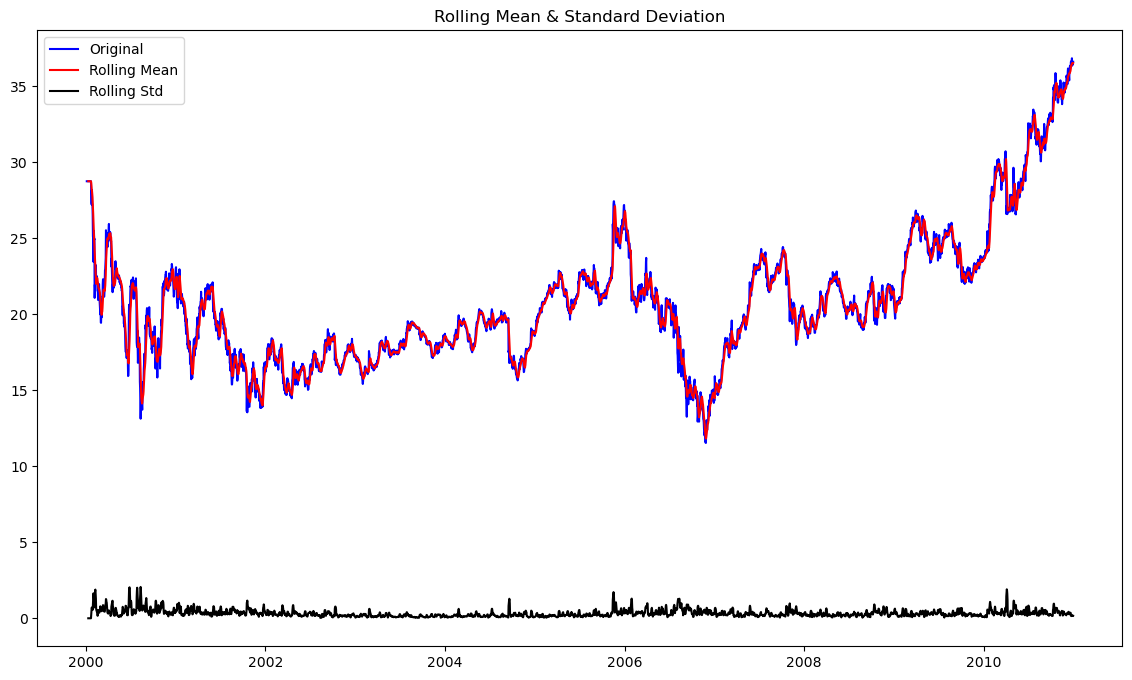

Results of Dickey-Fuller Test:
Test Statistic                   -1.702053
p-value                           0.430055
#Lags Used                       14.000000
Number of Observations Used    3999.000000
Critical Value (1%)              -3.431986
Critical Value (5%)              -2.862263
Critical Value (10%)             -2.567155
dtype: float64 



In [116]:
test_stationarity(train_m['Adj Close'])

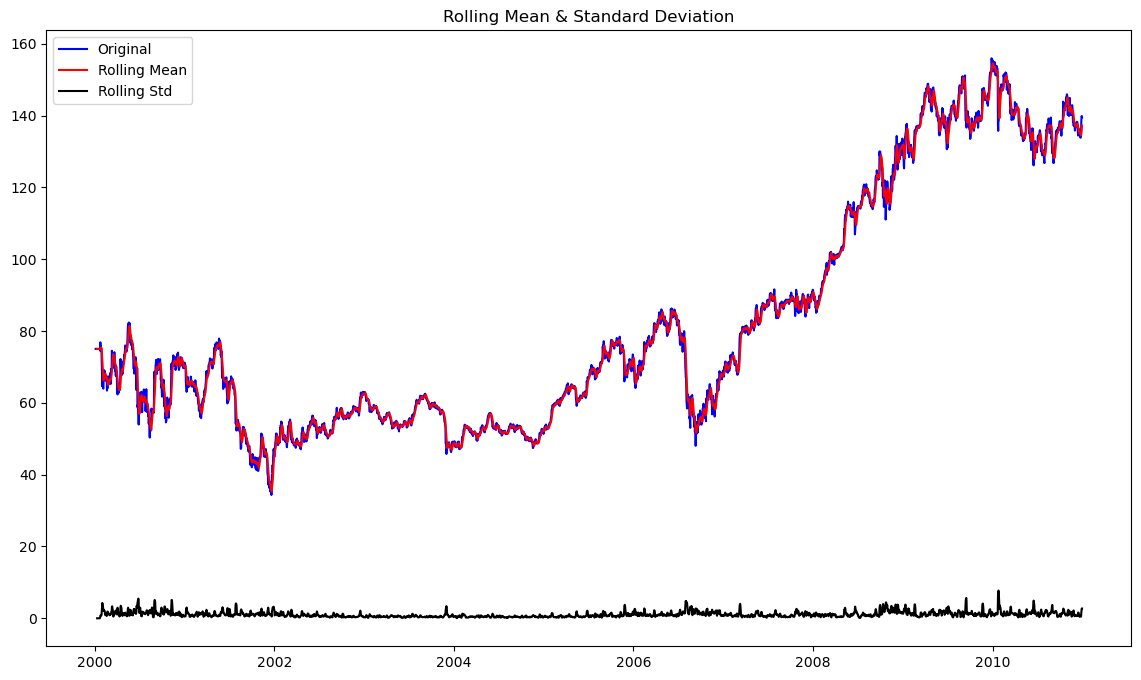

Results of Dickey-Fuller Test:
Test Statistic                   -0.294001
p-value                           0.926350
#Lags Used                        7.000000
Number of Observations Used    4006.000000
Critical Value (1%)              -3.431983
Critical Value (5%)              -2.862262
Critical Value (10%)             -2.567154
dtype: float64 



In [117]:
test_stationarity(train_i['Adj Close'])

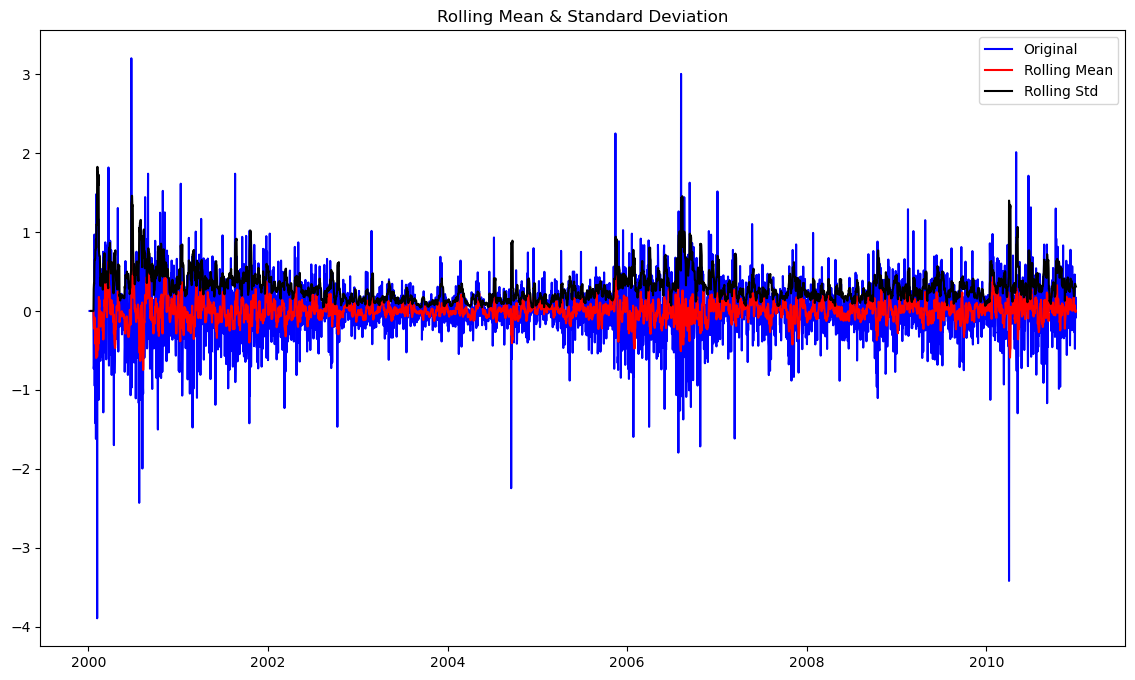

Results of Dickey-Fuller Test:
Test Statistic                  -34.229811
p-value                           0.000000
#Lags Used                        3.000000
Number of Observations Used    4009.000000
Critical Value (1%)              -3.431982
Critical Value (5%)              -2.862261
Critical Value (10%)             -2.567154
dtype: float64 



In [118]:
test_stationarity(train_m['Adj Close'].diff().dropna())

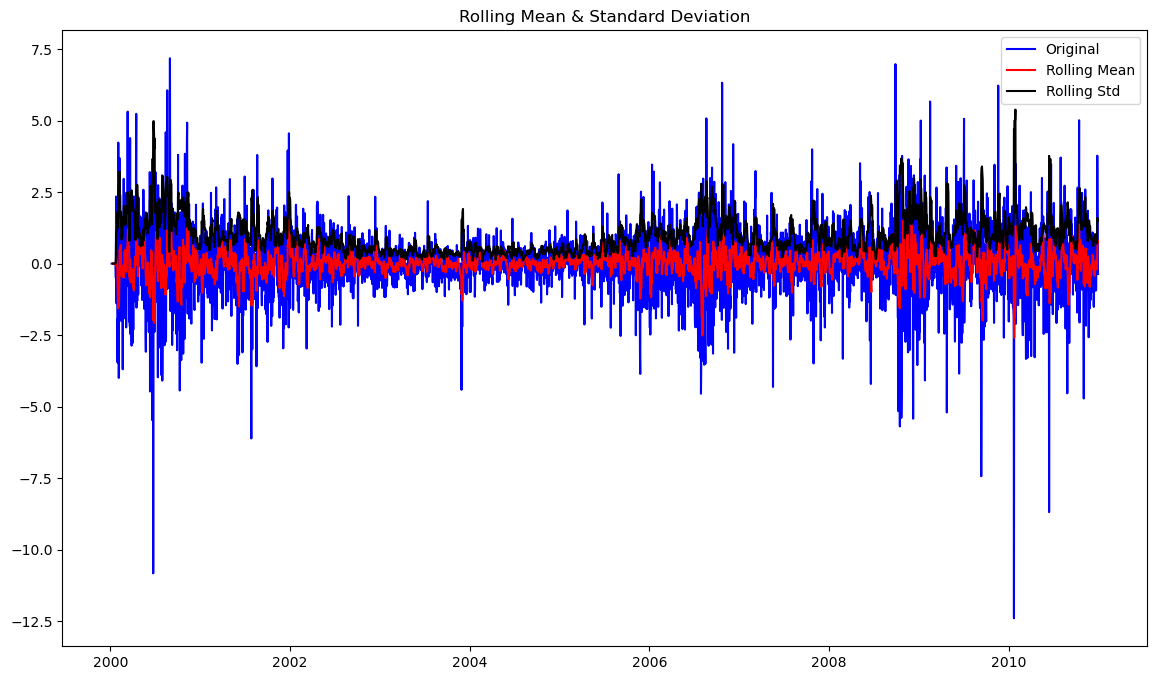

Results of Dickey-Fuller Test:
Test Statistic                  -25.932486
p-value                           0.000000
#Lags Used                        6.000000
Number of Observations Used    4006.000000
Critical Value (1%)              -3.431983
Critical Value (5%)              -2.862262
Critical Value (10%)             -2.567154
dtype: float64 



In [119]:
test_stationarity(train_i['Adj Close'].diff().dropna())

In [120]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [121]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [125]:
from statsmodels.tsa.arima_model import ARIMA 
import itertools
import pandas as pd
import warnings

In [126]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [127]:
for param in pdq:
    ARIMA_model = ARIMA(train_m['Adj Close'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [130]:
import pandas as pd
import itertools
from statsmodels.tsa.arima.model import ARIMA
 

p = q = range(0, 3)
d = range(1, 2)  
pdq = list(itertools.product(p, d, q))


print('Some parameter combinations for the Model...')
for i in range(1, len(pdq)):
    print('Model: {}'.format(pdq[i]))


ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])


for param in pdq:
    try:
        ARIMA_model = ARIMA(train_m['Adj Close'].values, order=param)
        ARIMA_fitted = ARIMA_model.fit()
     
        print(f'ARIMA{param} - AIC: {ARIMA_fitted.aic}')
        
      
        ARIMA_AIC = ARIMA_AIC.append({'param': param, 'AIC': ARIMA_fitted.aic}, ignore_index=True)
    except Exception as e:
        print(f"Error fitting ARIMA{param}: {e}")
        continue


print("\nAIC Values for different ARIMA models:")
print(ARIMA_AIC)

best_model = ARIMA_AIC.loc[ARIMA_AIC['AIC'].idxmin()]
print("\nBest ARIMA Model (with lowest AIC):")
print(best_model)



Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
ARIMA(0, 1, 0) - AIC: 3412.373862645515
ARIMA(0, 1, 1) - AIC: 3411.0409782511183
ARIMA(0, 1, 2) - AIC: 3412.067179940176
ARIMA(1, 1, 0) - AIC: 3411.1370789655275
ARIMA(1, 1, 1) - AIC: 3407.4927128875825
ARIMA(1, 1, 2) - AIC: 3409.299851484012
ARIMA(2, 1, 0) - AIC: 3412.3540144138524
ARIMA(2, 1, 1) - AIC: 3409.284554963532
ARIMA(2, 1, 2) - AIC: 3411.4458224847854

AIC Values for different ARIMA models:
       param          AIC
0  (0, 1, 0)  3412.373863
1  (0, 1, 1)  3411.040978
2  (0, 1, 2)  3412.067180
3  (1, 1, 0)  3411.137079
4  (1, 1, 1)  3407.492713
5  (1, 1, 2)  3409.299851
6  (2, 1, 0)  3412.354014
7  (2, 1, 1)  3409.284555
8  (2, 1, 2)  3411.445822

Best ARIMA Model (with lowest AIC):
param      (1, 1, 1)
AIC      3407.492713
Name: 4, dtype: object


In [131]:
import pandas as pd
import itertools
from statsmodels.tsa.arima.model import ARIMA
 

p = q = range(0, 3)
d = range(1, 2)  
pdq = list(itertools.product(p, d, q))


print('Some parameter combinations for the Model...')
for i in range(1, len(pdq)):
    print('Model: {}'.format(pdq[i]))


ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])


for param in pdq:
    try:
        ARIMA_model = ARIMA(train_i['Adj Close'].values, order=param)
        ARIMA_fitted = ARIMA_model.fit()
     
        print(f'ARIMA{param} - AIC: {ARIMA_fitted.aic}')
        
      
        ARIMA_AIC = ARIMA_AIC.append({'param': param, 'AIC': ARIMA_fitted.aic}, ignore_index=True)
    except Exception as e:
        print(f"Error fitting ARIMA{param}: {e}")
        continue


print("\nAIC Values for different ARIMA models:")
print(ARIMA_AIC)

best_model = ARIMA_AIC.loc[ARIMA_AIC['AIC'].idxmin()]
print("\nBest ARIMA Model (with lowest AIC):")
print(best_model)



Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
ARIMA(0, 1, 0) - AIC: 12802.14029655006
ARIMA(0, 1, 1) - AIC: 12803.317878718102
ARIMA(0, 1, 2) - AIC: 12805.123493737814
ARIMA(1, 1, 0) - AIC: 12803.329222655288
ARIMA(1, 1, 1) - AIC: 12800.7056287874
ARIMA(1, 1, 2) - AIC: 12802.618748405413
ARIMA(2, 1, 0) - AIC: 12805.14139158363
ARIMA(2, 1, 1) - AIC: 12802.618334527298
ARIMA(2, 1, 2) - AIC: 12803.495940137065

AIC Values for different ARIMA models:
       param           AIC
0  (0, 1, 0)  12802.140297
1  (0, 1, 1)  12803.317879
2  (0, 1, 2)  12805.123494
3  (1, 1, 0)  12803.329223
4  (1, 1, 1)  12800.705629
5  (1, 1, 2)  12802.618748
6  (2, 1, 0)  12805.141392
7  (2, 1, 1)  12802.618335
8  (2, 1, 2)  12803.495940

Best ARIMA Model (with lowest AIC):
param       (1, 1, 1)
AIC      12800.705629
Name: 4, dtype: object


In [133]:
auto_ARIMA = ARIMA(train_m['Adj Close'], order=(1,1,1),freq='D')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Shourya Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 4014
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1700.746
Date:                Wed, 07 May 2025   AIC                           3407.493
Time:                        21:46:53   BIC                           3426.385
Sample:                    01-05-2000   HQIC                          3414.188
                         - 12-31-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6821      0.121      5.621      0.000       0.444       0.920
ma.L1         -0.7165      0.115     -6.215      0.000      -0.943      -0.491
sigma2         0.1367      0.001    113.406      0.0

In [134]:
auto_ARIMA = ARIMA(train_i['Adj Close'], order=(1,1,1),freq='D')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Shourya Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 4014
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6397.353
Date:                Wed, 07 May 2025   AIC                          12800.706
Time:                        21:47:27   BIC                          12819.598
Sample:                    01-05-2000   HQIC                         12807.401
                         - 12-31-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9526      0.029     32.580      0.000       0.895       1.010
ma.L1         -0.9638      0.026    -37.152      0.000      -1.015      -0.913
sigma2         1.4197      0.014    101.451      0.0

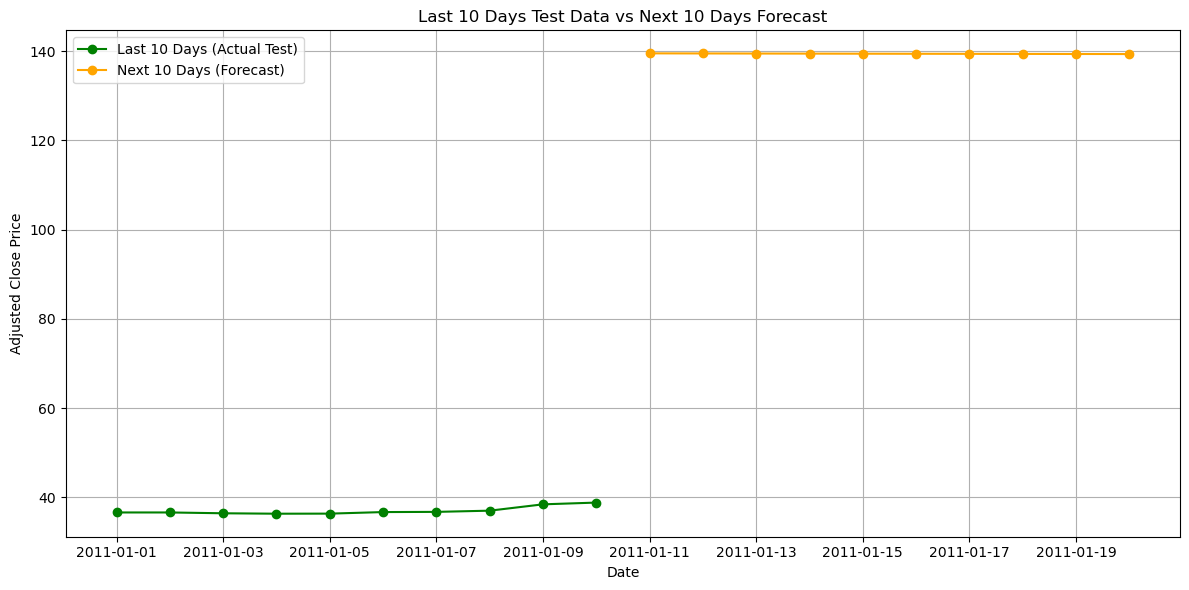

In [143]:

test_m.index = pd.to_datetime(test_m.index)

last_10_test = test_m['Adj Close'].iloc[:10] 


forecast_obj = results_auto_ARIMA.get_forecast(steps=10)
forecast_mean = forecast_obj.predicted_mean
future_dates = pd.date_range(start=last_10_test.index[-1] + pd.Timedelta(days=1), periods=10, freq='D')


plt.figure(figsize=(12, 6))
plt.plot(last_10_test.index, last_10_test.values, label='Last 10 Days (Actual Test)', color='green', marker='o')
plt.plot(future_dates, forecast_mean, label='Next 10 Days (Forecast)', color='orange', marker='o')
plt.title('Last 10 Days Test Data vs Next 10 Days Forecast')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


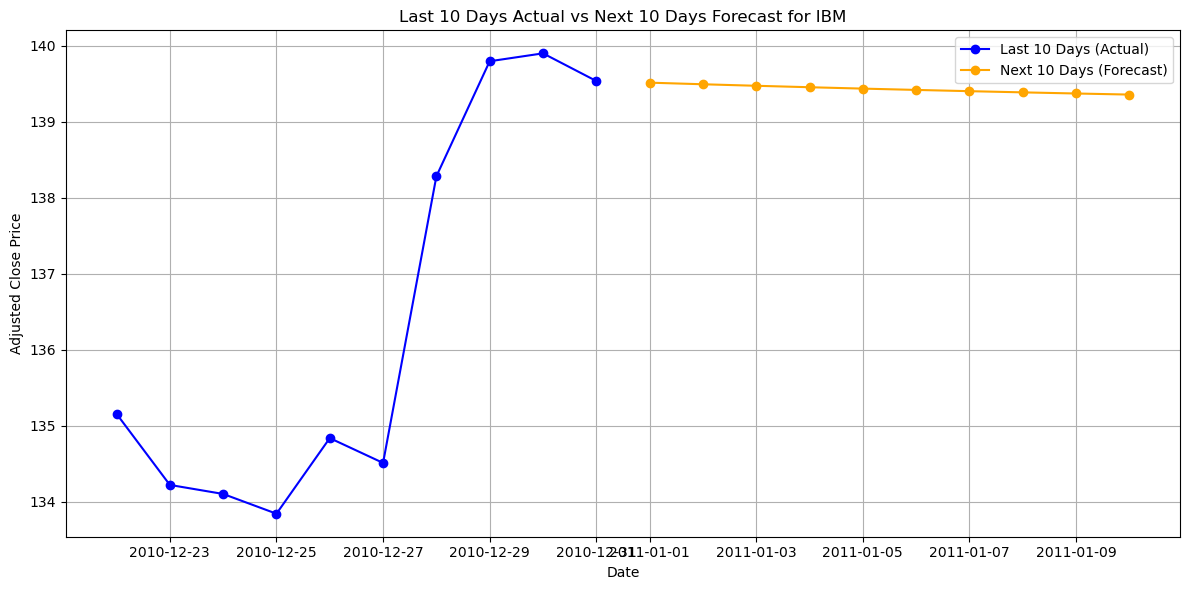

In [144]:
train_i.index = pd.to_datetime(train_i.index)


last_10_actual = train_i['Adj Close'].iloc[-10:]


forecast_obj = results_auto_ARIMA.get_forecast(steps=10)
forecast_mean = forecast_obj.predicted_mean


future_dates = pd.date_range(start=last_10_actual.index[-1] + pd.Timedelta(days=1), periods=10, freq='D')


plt.figure(figsize=(12, 6))
plt.plot(last_10_actual.index, last_10_actual.values, label='Last 10 Days (Actual)', color='blue', marker='o')
plt.plot(future_dates, forecast_mean, label='Next 10 Days (Forecast)', color='orange', marker='o')
plt.title('Last 10 Days Actual vs Next 10 Days Forecast for IBM')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## ✅ We successfully identified 4242 buy and 1,746 sell opportunities in both MSFT and IBM historical data.
## ✅ Using ARIMA modeling, we forecasted stock prices for both companies over the next 10 days, aiding in short-term trading decision-making.